# Neighborhood Restaurant Recommender

#### Lets download all the libraries that we might need for this project

In [1]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
print('Libraries imported.')

Libraries imported.


In [4]:
!conda install -c conda-forge geopy --yes

Solving environment: ...working... done

# All requested packages already installed.



#### Lets convert an address into latitude and longitude values

In [5]:
from geopy.geocoders import Nominatim

# 1. Download and Explore Dataset

### Lets load and explore our data

In [10]:
with open('nyu_2451_34572-geojson.json') as json_data:
    newyork_data = json.load(json_data)

In [11]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [13]:
# Let us define a new variable that includes the list features

neighborhoods_data = newyork_data['features']
neighborhoods_data[0]


{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

####  Let's transform the data into pandas dataframe

In [14]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [15]:
#Let's start by creating an empty dataframe

neighborhoods

Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []

In [16]:
# Looping through the data and fill the dataframe one row at a time

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)


In [17]:
neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [18]:
# Lets check the data set has all 5 boroughs and 306 neighborhoods.

print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Get the latitude and longitude values of NEW YORK city

In [19]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of new York with neighborhoods superimposed on top

In [21]:
import folium

# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

## Segment the neighboors of all 5 Boroughs

#### Brooklyn Data

In [22]:
brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
brooklyn_data.head()

Borough Neighborhood   Latitude  Longitude
0  Brooklyn    Bay Ridge  40.625801 -74.030621
1  Brooklyn  Bensonhurst  40.611009 -73.995180
2  Brooklyn  Sunset Park  40.645103 -74.010316
3  Brooklyn   Greenpoint  40.730201 -73.954241
4  Brooklyn    Gravesend  40.595260 -73.973471

In [23]:
# Geographical coordinates of Brooklyn

address = 'Brooklyn, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


In [24]:
# create map of Brooklyn using latitude and longitude values
map_brooklyn = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(brooklyn_data['Latitude'], brooklyn_data['Longitude'], brooklyn_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brooklyn)  
    
map_brooklyn

#### Manhatten Data

In [25]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

Borough        Neighborhood   Latitude  Longitude
0  Manhattan         Marble Hill  40.876551 -73.910660
1  Manhattan           Chinatown  40.715618 -73.994279
2  Manhattan  Washington Heights  40.851903 -73.936900
3  Manhattan              Inwood  40.867684 -73.921210
4  Manhattan    Hamilton Heights  40.823604 -73.949688

In [26]:
# using Google to get the lat & long coordinates of Manhattan
latitude2 = 40.7900869
longitude2 = -73.9598295
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude2, longitude2))

The geograpical coordinate of Manhattan are 40.7900869, -73.9598295.


In [27]:
# Visualizing Manhatten and all the neighborhoods in it.

In [28]:
# create map of Manhattan using latitude2 and longitude2 values
map_manhattan = folium.Map(location=[latitude2, longitude2], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

#### Queens Data

In [29]:
queens_data = neighborhoods[neighborhoods['Borough'] == 'Queens'].reset_index(drop=True)
queens_data.head()

Borough     Neighborhood   Latitude  Longitude
0  Queens          Astoria  40.768509 -73.915654
1  Queens         Woodside  40.746349 -73.901842
2  Queens  Jackson Heights  40.751981 -73.882821
3  Queens         Elmhurst  40.744049 -73.881656
4  Queens     Howard Beach  40.654225 -73.838138

In [30]:
# using Google to get the lat & long coordinates of Queens

latitude3 = 40.7282
longitude3 = -73.7949
print('The geograpical coordinate of Queens are {}, {}.'.format(latitude3, longitude3))

The geograpical coordinate of Queens are 40.7282, -73.7949.


In [31]:
# create map of Queens using latitude3 and longitude3 values
map_queens = folium.Map(location=[latitude3, longitude3], zoom_start=11)

# add markers to map
for lat, lng, label in zip(queens_data['Latitude'], queens_data['Longitude'], queens_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_queens)  
    
map_queens

#### Bronx Data

In [32]:
bronx_data = neighborhoods[neighborhoods['Borough'] == 'Bronx'].reset_index(drop=True)
bronx_data.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [33]:
# using Google to get the lat & long coordinates of Bronx
latitude4 = 40.8448
longitude4 = -73.8648
print('The geograpical coordinate of Bronx are {}, {}.'.format(latitude4, longitude4))

The geograpical coordinate of Bronx are 40.8448, -73.8648.


In [34]:
# create map of Bronx using latitude4 and longitude4 values
map_bronx = folium.Map(location=[latitude4, longitude4], zoom_start=11)

# add markers to map
for lat, lng, label in zip(bronx_data['Latitude'], bronx_data['Longitude'], bronx_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bronx)  
    
map_bronx

#### Staten Island Data

In [35]:
staten_data = neighborhoods[neighborhoods['Borough'] == 'Staten Island'].reset_index(drop=True)
staten_data.head()

Borough   Neighborhood   Latitude  Longitude
0  Staten Island     St. George  40.644982 -74.079353
1  Staten Island   New Brighton  40.640615 -74.087017
2  Staten Island      Stapleton  40.626928 -74.077902
3  Staten Island       Rosebank  40.615305 -74.069805
4  Staten Island  West Brighton  40.631879 -74.107182

In [36]:
# using Google to get the lat & long coordinates of Staten Island
latitude5 = 40.5795
longitude5 = -74.1502
print('The geograpical coordinate of Staten Island are {}, {}.'.format(latitude5, longitude5))

The geograpical coordinate of Staten Island are 40.5795, -74.1502.


In [37]:
# create map of Staten  Island using latitude5 and longitude5 values
map_staten = folium.Map(location=[latitude5, longitude5], zoom_start=11)

# add markers to map
for lat, lng, label in zip(staten_data['Latitude'], staten_data['Longitude'], staten_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_staten)  
    
map_staten

Using Foursquare API to explore the neighborhoods and segment them.

### Foursquare Credentials and Version

In [38]:
CLIENT_ID = 'ALIYUADVAVSFIVRT1QDCPCJGIW5PTFMGKI2YBUJHRABJCJDY' # your Foursquare ID
CLIENT_SECRET = '0SAC4KOFUO3LUJ14TGFRKLCCDTP4KMMFMUG4D32OSS5SXLJC' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version

#### Exploring all of our 5 dataframes


1. brooklyn_data
2. manhatten_data
3. queens_data
4. bronx_data
5. staten_data

In [39]:
# exloring the first neighboordhood in  Brooklyn dataframe

brooklyn_data.loc[0, 'Neighborhood']


'Bay Ridge'

In [40]:
# Get the neighborhood's latitude and longitude values.

neighborhood_latitude = brooklyn_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = brooklyn_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = brooklyn_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bay Ridge are 40.625801065010656, -74.03062069353813.


#### Getting to 100 venues in the Bay Ridge within raduius of 500 meters.

In [41]:
# limit of number of venues returned by Foursquare API
LIMIT = 100

# define radius
radius = 500

# URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, neighborhood_latitude, neighborhood_longitude, radius, LIMIT)

url

'https://api.foursquare.com/v2/venues/explore?&client_id=ALIYUADVAVSFIVRT1QDCPCJGIW5PTFMGKI2YBUJHRABJCJDY&client_secret=0SAC4KOFUO3LUJ14TGFRKLCCDTP4KMMFMUG4D32OSS5SXLJC&v=20180604&ll=40.625801065010656,-74.03062069353813&radius=500&limit=100'

In [42]:
# Sending the GET request and examine the results

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6039e77f28bfc91c2c093abb'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bay Ridge',
  'headerFullLocation': 'Bay Ridge, Brooklyn',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 81,
  'suggestedBounds': {'ne': {'lat': 40.63030106951066,
    'lng': -74.02470273356597},
   'sw': {'lat': 40.62130106051065, 'lng': -74.03653865351028}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b895827f964a5206c2d32e3',
       'name': 'Pilo Arts Day Spa and Salon',
       'location': {'address': '8412 3rd Ave',
        'lat': 40.62474788273414,
        'lng': -74.03059056940135,
        'labeledLatL

We know that all the information is in the items key. Before we proceed, let's borrow the get_category_type function from the Foursquare lab in Week 2 of this Capstone course.

In [43]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [44]:
# Let's clean the json and structure it into pandas dataframe

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-44-b0e7509535a8>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


name      categories        lat        lng
0  Pilo Arts Day Spa and Salon             Spa  40.624748 -74.030591
1                    Bagel Boy      Bagel Shop  40.627896 -74.029335
2          Leo's Casa Calamari     Pizza Place  40.624200 -74.030931
3                Cocoa Grinder       Juice Bar  40.623967 -74.030863
4                 Pegasus Cafe  Breakfast Spot  40.623168 -74.031186

In [45]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

81 venues were returned by Foursquare.


#### Let's explore the first neighborhood in the Manhatten Dataframe

In [46]:
manhattan_data.loc[0, 'Neighborhood']

'Marble Hill'

In [47]:
# Getting the neighborhood's latitude and longitude values.

neighborhood_latitude2 = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude2 = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name2 = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name2, 
                                                               neighborhood_latitude2, 
                                                               neighborhood_longitude2))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


#### Let's get the top 100 venues that are in Marble Hill within radius of 500 meters

First, lets create the GET request URL

In [48]:
# limit of number of venues returned by Foursquare API
LIMIT = 100

# define radius
radius = 500

# URL
url2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, neighborhood_latitude2, neighborhood_longitude2, radius, LIMIT)

url2

'https://api.foursquare.com/v2/venues/explore?&client_id=ALIYUADVAVSFIVRT1QDCPCJGIW5PTFMGKI2YBUJHRABJCJDY&client_secret=0SAC4KOFUO3LUJ14TGFRKLCCDTP4KMMFMUG4D32OSS5SXLJC&v=20180604&ll=40.87655077879964,-73.91065965862981&radius=500&limit=100'

In [49]:
# Sending the GET request and examine the results

results2 = requests.get(url2).json()
results2

{'meta': {'code': 200, 'requestId': '6039e8d41a62722185f0bffc'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Marble Hill',
  'headerFullLocation': 'Marble Hill, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 25,
  'suggestedBounds': {'ne': {'lat': 40.88105078329964,
    'lng': -73.90471933917806},
   'sw': {'lat': 40.87205077429964, 'lng': -73.91659997808156}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b4429abf964a52037f225e3',
       'name': "Arturo's",
       'location': {'address': '5198 Broadway',
        'crossStreet': 'at 225th St.',
        'lat': 40.87441177110231,
        'lng': -73.91027100981574,
        'labeledLatLngs': [{'label'

We know that all the information is in the items key. Before we proceed, let's borrow the get_category_type function from the Foursquare lab in Week 2 of this Capstone course.

In [50]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [51]:
# Now we are ready to clean the json and structure it into pandas dataframe

venues2 = results2['response']['groups'][0]['items']
    
nearby_venues2 = json_normalize(venues2) # flatten JSON

# filter columns
filtered_columns2 = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues2 =nearby_venues2.loc[:, filtered_columns2]

# filter the category for each row
nearby_venues2['venue.categories'] = nearby_venues2.apply(get_category_type, axis=1)

# clean columns
nearby_venues2.columns = [col.split(".")[-1] for col in nearby_venues2.columns]

nearby_venues2.head()

<ipython-input-51-73f536fdae58>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues2 = json_normalize(venues2) # flatten JSON


name   categories        lat        lng
0       Arturo's  Pizza Place  40.874412 -73.910271
1    Bikram Yoga  Yoga Studio  40.876844 -73.906204
2  Tibbett Diner        Diner  40.880404 -73.908937
3      Starbucks  Coffee Shop  40.877531 -73.905582
4        Dunkin'   Donut Shop  40.877136 -73.906666

In [52]:
print('{} venues were returned by Foursquare.'.format(nearby_venues2.shape[0]))

25 venues were returned by Foursquare.


#### Let's exlore the first neighborhood in our Queens dataframe.

In [54]:
queens_data.loc[0, 'Neighborhood']

'Astoria'

Getting the latitude and longitude values

In [55]:
neighborhood_latitude3 = queens_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude3 = queens_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name3 = queens_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name3, 
                                                               neighborhood_latitude3, 
                                                               neighborhood_longitude3))

Latitude and longitude values of Astoria are 40.76850859335492, -73.91565374304234.


#### Now, let's get top 100 venues that are in Asroria within a radius of 500 meters.

Let's create the GET request URL

In [56]:
# limit of number of venues returned by Foursquare API
LIMIT = 100

# define radius
radius = 500

# URL
url3 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, neighborhood_latitude3, neighborhood_longitude3, radius, LIMIT)

url3

'https://api.foursquare.com/v2/venues/explore?&client_id=ALIYUADVAVSFIVRT1QDCPCJGIW5PTFMGKI2YBUJHRABJCJDY&client_secret=0SAC4KOFUO3LUJ14TGFRKLCCDTP4KMMFMUG4D32OSS5SXLJC&v=20180604&ll=40.76850859335492,-73.91565374304234&radius=500&limit=100'

In [57]:
# Send the GET request and examine the results

results3 = requests.get(url3).json()
results3

{'meta': {'code': 200, 'requestId': '6039e9d291a9d65b6688e8ec'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Astoria',
  'headerFullLocation': 'Astoria, Queens',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 103,
  'suggestedBounds': {'ne': {'lat': 40.773008597854925,
    'lng': -73.90972309237958},
   'sw': {'lat': 40.76400858885492, 'lng': -73.9215843937051}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bdf502a89ca76b062b75d5e',
       'name': 'Favela Grill',
       'location': {'address': '33-18 28th Ave',
        'crossStreet': 'btwn 33rd & 34th St.',
        'lat': 40.76734843380796,
        'lng': -73.9178974

We know that all the information is in the items key. Before we proceed, let's borrow the get_category_type function from the Foursquare lab in Week 2 of this Capstone course.

In [58]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into pandas dataframe.

In [59]:
venues3 = results3['response']['groups'][0]['items']
    
nearby_venues3 = json_normalize(venues3) # flatten JSON

# filter columns
filtered_columns3 = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues3 =nearby_venues3.loc[:, filtered_columns3]

# filter the category for each row
nearby_venues3['venue.categories'] = nearby_venues3.apply(get_category_type, axis=1)

# clean columns
nearby_venues3.columns = [col.split(".")[-1] for col in nearby_venues3.columns]

nearby_venues3.head()

<ipython-input-59-bab03cb80d05>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues3 = json_normalize(venues3) # flatten JSON


name            categories        lat        lng
0      Favela Grill  Brazilian Restaurant  40.767348 -73.917897
1    Orange Blossom          Gourmet Shop  40.769856 -73.917012
2      Off The Hook    Seafood Restaurant  40.767200 -73.918104
3  Titan Foods Inc.          Gourmet Shop  40.769198 -73.919253
4   CrossFit Queens                   Gym  40.769404 -73.918977

In [60]:
print('{} venues were returned by Foursquare.'.format(nearby_venues3.shape[0]))

100 venues were returned by Foursquare.


#### Let's explore the first neighborhood in our Bronx dataframe.

In [62]:
bronx_data.loc[0, 'Neighborhood']

'Wakefield'

Get the neighborhood's latitude and longitude values.

In [63]:
neighborhood_latitude4 = bronx_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude4 = bronx_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name4 = bronx_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name4, 
                                                               neighborhood_latitude4, 
                                                               neighborhood_longitude4))

Latitude and longitude values of Wakefield are 40.89470517661, -73.84720052054902.


#### Now, let's get the top 100 venues that are in Wakefield within a radius of 500 meters.

First, let's create the GET request URL

In [64]:
LIMIT = 100

# define radius
radius = 500

# URL
url4 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, neighborhood_latitude4, neighborhood_longitude4, radius, LIMIT)

url4

'https://api.foursquare.com/v2/venues/explore?&client_id=ALIYUADVAVSFIVRT1QDCPCJGIW5PTFMGKI2YBUJHRABJCJDY&client_secret=0SAC4KOFUO3LUJ14TGFRKLCCDTP4KMMFMUG4D32OSS5SXLJC&v=20180604&ll=40.89470517661,-73.84720052054902&radius=500&limit=100'

Send the GET request and examine the resutls

In [65]:
results4 = requests.get(url4).json()
results4

{'meta': {'code': 200, 'requestId': '6039eac24a1f991192010490'},
 'response': {'headerLocation': 'Wakefield',
  'headerFullLocation': 'Wakefield, Bronx',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 9,
  'suggestedBounds': {'ne': {'lat': 40.899205181110005,
    'lng': -73.84125857127495},
   'sw': {'lat': 40.89020517211, 'lng': -73.8531424698231}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c537892fd2ea593cb077a28',
       'name': 'Lollipops Gelato',
       'location': {'address': '4120 Baychester Ave',
        'crossStreet': 'Edenwald & Bussing Ave',
        'lat': 40.894123150205274,
        'lng': -73.84589162362325,
        'labeledLatLngs': [{'label': 'display',
          'lat': 40.894123150205274,
          'lng': -73.84589162362325},
    

We know that all the information is in the items key. Before we proceed, let's borrow the get_category_type function from the Foursquare lab in Week 2 of this Capstone course.

In [66]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [67]:
venues4 = results4['response']['groups'][0]['items']
    
nearby_venues4 = json_normalize(venues4) # flatten JSON

# filter columns
filtered_columns4 = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues4 =nearby_venues4.loc[:, filtered_columns4]

# filter the category for each row
nearby_venues4['venue.categories'] = nearby_venues4.apply(get_category_type, axis=1)

# clean columns
nearby_venues4.columns = [col.split(".")[-1] for col in nearby_venues4.columns]

nearby_venues4.head()

<ipython-input-67-74dbdf99b287>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues4 = json_normalize(venues4) # flatten JSON


name      categories        lat        lng
0  Lollipops Gelato    Dessert Shop  40.894123 -73.845892
1          Rite Aid        Pharmacy  40.896649 -73.844846
2         Walgreens        Pharmacy  40.896528 -73.844700
3  Carvel Ice Cream  Ice Cream Shop  40.890487 -73.848568
4            Subway  Sandwich Place  40.890468 -73.849152

In [69]:
print('{} venues were returned by Foursquare.'.format(nearby_venues4.shape[0]))

9 venues were returned by Foursquare.


#### Let's exlplore the first neighborhoos in our Staten Island dataframe.

In [71]:
staten_data.loc[0, 'Neighborhood']

'St. George'

Get the neighborhood's latitude and longitude values.

In [74]:
neighborhood_latitude5 = staten_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude5 = staten_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name5 = staten_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name5, 
                                                               neighborhood_latitude5, 
                                                               neighborhood_longitude5))

Latitude and longitude values of St. George are 40.6449815710044, -74.07935312512797.


#### Now, let's get the top 100 venues that are in St. George within a radius of 500 meters.

First, let's create the GET request URL

In [75]:
# limit of number of venues returned by Foursquare API
LIMIT = 100

# define radius
radius = 500

# URL
url5 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, neighborhood_latitude5, neighborhood_longitude5, radius, LIMIT)

url5

'https://api.foursquare.com/v2/venues/explore?&client_id=ALIYUADVAVSFIVRT1QDCPCJGIW5PTFMGKI2YBUJHRABJCJDY&client_secret=0SAC4KOFUO3LUJ14TGFRKLCCDTP4KMMFMUG4D32OSS5SXLJC&v=20180604&ll=40.6449815710044,-74.07935312512797&radius=500&limit=100'

Send the GET request and examine the results

In [76]:
results5 = requests.get(url5).json()
results5

{'meta': {'code': 200, 'requestId': '6039ebc953127d09e678b77f'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 37,
  'suggestedBounds': {'ne': {'lat': 40.6494815755044,
    'lng': -74.07343346476772},
   'sw': {'lat': 40.6404815665044, 'lng': -74.08527278548821}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bb6924c46d4a5938e7ac6c0',
       'name': 'A&S Pizzeria',
       'location': {'address': '87 Stuyvesant Pl',
        'crossStreet': 'Wall st',
        'lat': 40.64393953223924,
        'lng': -74.0776259226109,
 

We know that all the information is in the items key. Before we proceed, let's borrow the get_category_type function from the Foursquare lab in Week 2 of this Capstone course.

In [77]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [78]:
venues5 = results5['response']['groups'][0]['items']
    
nearby_venues5 = json_normalize(venues5) # flatten JSON

# filter columns
filtered_columns5 = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues5 =nearby_venues5.loc[:, filtered_columns5]

# filter the category for each row
nearby_venues5['venue.categories'] = nearby_venues5.apply(get_category_type, axis=1)

# clean columns
nearby_venues5.columns = [col.split(".")[-1] for col in nearby_venues5.columns]

nearby_venues5.head()

<ipython-input-78-0782bfb21b19>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues5 = json_normalize(venues5) # flatten JSON


name           categories        lat  \
0                         A&S Pizzeria          Pizza Place  40.643940   
1        Richmond County Bank Ballpark     Baseball Stadium  40.645056   
2                                 Beso     Tapas Restaurant  40.643306   
3  Staten Island September 11 Memorial  Monument / Landmark  40.646767   
4                         Ruddy & Dean                  Bar  40.644074   

         lng  
0 -74.077626  
1 -74.076864  
2 -74.076508  
3 -74.076510  
4 -74.076683

In [79]:
print('{} venues were returned by Foursquare.'.format(nearby_venues5.shape[0]))

37 venues were returned by Foursquare.


# 2. Explore Neighborhoods in all 5 Boroughs

#### Let's create a function to repeat the same process to all the neighborhoods in all of the 5 Boroughs

1. Brooklyn
2. Manhatten
3. Queens
4. Bronx
5. Staten Island

#### Neighborhoods Complete: Brooklyn

In [83]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called brooklyn_venues.

In [84]:
brooklyn_venues = getNearbyVenues(names=brooklyn_data['Neighborhood'],
                                   latitudes=brooklyn_data['Latitude'],
                                   longitudes=brooklyn_data['Longitude']
                                  )

Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


#### Let's check the size of the resulting dataframe

In [85]:
print(brooklyn_venues.shape)
brooklyn_venues.head()

(2702, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Bay Ridge              40.625801              -74.030621   
1    Bay Ridge              40.625801              -74.030621   
2    Bay Ridge              40.625801              -74.030621   
3    Bay Ridge              40.625801              -74.030621   
4    Bay Ridge              40.625801              -74.030621   

                         Venue  Venue Latitude  Venue Longitude  \
0  Pilo Arts Day Spa and Salon       40.624748       -74.030591   
1                    Bagel Boy       40.627896       -74.029335   
2          Leo's Casa Calamari       40.624200       -74.030931   
3                Cocoa Grinder       40.623967       -74.030863   
4                 Pegasus Cafe       40.623168       -74.031186   

   Venue Category  
0             Spa  
1      Bagel Shop  
2     Pizza Place  
3       Juice Bar  
4  Breakfast Spot

Let's check how many venues were returned for each neighborhood

In [86]:
brooklyn_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                               
Bath Beach                                    43                      43   
Bay Ridge                                     81                      81   
Bedford Stuyvesant                            29                      29   
Bensonhurst                                   34                      34   
Bergen Beach                                   7                       7   
Boerum Hill                                   88                      88   
Borough Park                                  22                      22   
Brighton Beach                                43                      43   
Broadway Junction                             18                      18   
Brooklyn Heights                             100                     100   
Brownsville                                   14                      14   
Bushwick                                      72                      72   
Canarsie                                       5                       5   
Carroll Gardens                              100                     100   
City Line                                     32                      32   
Clinton Hill                                  97                      97   
Cobble Hill                                   95                      95   
Coney Island                                  16                      16   
Crown Heights                                 18                      18   
Cypress Hills                                 22                      22   
Ditmas Park                                   54                      54   
Downtown                                     100                     100   
Dumbo                                         59                      59   
Dyker Heights                                  6                       6   
East Flatbush                                 10                      10   
East New York                                 11                      11   
East Williamsburg                             62                      62   
Erasmus                                       25                      25   
Flatbush                                      22                      22   
Flatlands                                     18                      18   
Fort Greene                                   67                      67   
Fort Hamilton                                 62                      62   
Fulton Ferry                                  57                      57   
Georgetown                                    29                      29   
Gerritsen Beach                               18                      18   
Gowanus                                       63                      63   
Gravesend                                     20                      20   
Greenpoint                                   100                     100   
Highland Park                                 15                      15   
Homecrest                                     43                      43   
Kensington                                    36                      36   
Madison                                       11                      11   
Manhattan Beach                                9                       9   
Manhattan Terrace                             22                      22   
Marine Park                                   10                      10   
Midwood                                       10                      10   
Mill Basin                                    37                      37   
Mill Island                                    2                       2   
New Lots                                      19                      19   
North Side                                   100                     100   
Ocean Hill                                    26                      26   

#### Let's find out how many unique categories can be curated from all the returned venues.

Borrowing the getNearbyVenues() function from earlier.

#### Now write the code to run the above function on each neighborhood and create a new dataframe called manhattan_venues.

In [88]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


#### Let's check the size of the resulting dataframe

In [89]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3172, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude          Venue  \
0  Marble Hill              40.876551               -73.91066       Arturo's   
1  Marble Hill              40.876551               -73.91066    Bikram Yoga   
2  Marble Hill              40.876551               -73.91066  Tibbett Diner   
3  Marble Hill              40.876551               -73.91066      Starbucks   
4  Marble Hill              40.876551               -73.91066        Dunkin'   

   Venue Latitude  Venue Longitude Venue Category  
0       40.874412       -73.910271    Pizza Place  
1       40.876844       -73.906204    Yoga Studio  
2       40.880404       -73.908937          Diner  
3       40.877531       -73.905582    Coffee Shop  
4       40.877136       -73.906666     Donut Shop

Let's check how many venues were returned for each neighborhood

In [90]:
manhattan_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                                
Battery Park City                       76                      76     76   
Carnegie Hill                           86                      86     86   
Central Harlem                          44                      44     44   
Chelsea                                100                     100    100   
Chinatown                              100                     100    100   
Civic Center                           100                     100    100   
Clinton                                100                     100    100   
East Harlem                             37                      37     37   
East Village                           100                     100    100   
Financial District                     100                     100    100   
Flatiron                               100                     100    100   
Gramercy                                80                      80     80   
Greenwich Village                      100                     100    100   
Hamilton Heights                        62                      62     62   
Hudson Yards                            66                      66     66   
Inwood                                  55                      55     55   
Lenox Hill                             100                     100    100   
Lincoln Square                          94                      94     94   
Little Italy                           100                     100    100   
Lower East Side                         47                      47     47   
Manhattan Valley                        38                      38     38   
Manhattanville                          44                      44     44   
Marble Hill                             25                      25     25   
Midtown                                100                     100    100   
Midtown South                          100                     100    100   
Morningside Heights                     40                      40     40   
Murray Hill                            100                     100    100   
Noho                                   100                     100    100   
Roosevelt Island                        25                      25     25   
Soho                                   100                     100    100   
Stuyvesant Town                         19                      19     19   
Sutton Place                           100                     100    100   
Tribeca                                 82                      82     82   
Tudor City                              80                      80     80   
Turtle Bay                             100                     100    100   
Upper East Side                        100                     100    100   
Upper West Side                         89                      89     89   
Washington Heights                      83                      83     83   
West Village                           100                     100    100   
Yorkville                              100                     100    100   

                     Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                          
Battery Park City                76               76              76  
Carnegie Hill                    86               86              86  
Central Harlem                   44               44              44  
Chelsea                         100              100             100  
Chinatown                       100              100             100  
Civic Center                    100              100             100  
Clinton                         100              100             100  
East Harlem                      37               37              37  
East Village                    100              100             100  
Finan

#### Let's find out how many unique categories can be curated from all the returned venues.

In [91]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 333 uniques categories.


#### Complete Neighborhoods: Queens

Complete Neighborhoods: Queens

#### Now write the code to run the above function on each neighborhood and create a new dataframe called queens_venues.

In [92]:
queens_venues = getNearbyVenues(names=queens_data['Neighborhood'],
                                   latitudes=queens_data['Latitude'],
                                   longitudes=queens_data['Longitude']
                                  )

Astoria
Woodside
Jackson Heights
Elmhurst
Howard Beach
Corona
Forest Hills
Kew Gardens
Richmond Hill
Flushing
Long Island City
Sunnyside
East Elmhurst
Maspeth
Ridgewood
Glendale
Rego Park
Woodhaven
Ozone Park
South Ozone Park
College Point
Whitestone
Bayside
Auburndale
Little Neck
Douglaston
Glen Oaks
Bellerose
Kew Gardens Hills
Fresh Meadows
Briarwood
Jamaica Center
Oakland Gardens
Queens Village
Hollis
South Jamaica
St. Albans
Rochdale
Springfield Gardens
Cambria Heights
Rosedale
Far Rockaway
Broad Channel
Breezy Point
Steinway
Beechhurst
Bay Terrace
Edgemere
Arverne
Rockaway Beach
Neponsit
Murray Hill
Floral Park
Holliswood
Jamaica Estates
Queensboro Hill
Hillcrest
Ravenswood
Lindenwood
Laurelton
Lefrak City
Belle Harbor
Rockaway Park
Somerville
Brookville
Bellaire
North Corona
Forest Hills Gardens
Jamaica Hills
Utopia
Pomonok
Astoria Heights
Hunters Point
Sunnyside Gardens
Blissville
Roxbury
Middle Village
Malba
Hammels
Bayswater
Queensbridge


#### Let's check the size of the resulting dataframe

In [93]:
print(queens_venues.shape)
queens_venues.head()

(2101, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      Astoria              40.768509              -73.915654   
1      Astoria              40.768509              -73.915654   
2      Astoria              40.768509              -73.915654   
3      Astoria              40.768509              -73.915654   
4      Astoria              40.768509              -73.915654   

              Venue  Venue Latitude  Venue Longitude        Venue Category  
0      Favela Grill       40.767348       -73.917897  Brazilian Restaurant  
1    Orange Blossom       40.769856       -73.917012          Gourmet Shop  
2      Off The Hook       40.767200       -73.918104    Seafood Restaurant  
3  Titan Foods Inc.       40.769198       -73.919253          Gourmet Shop  
4   CrossFit Queens       40.769404       -73.918977                   Gym

Let's check how many venues were returned for each neighborhood.

In [94]:
queens_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                                 
Arverne                                  19                      19     19   
Astoria                                 100                     100    100   
Astoria Heights                          13                      13     13   
Auburndale                               19                      19     19   
Bay Terrace                              35                      35     35   
Bayside                                  75                      75     75   
Bayswater                                 1                       1      1   
Beechhurst                               16                      16     16   
Bellaire                                 13                      13     13   
Belle Harbor                             18                      18     18   
Bellerose                                19                      19     19   
Blissville                               18                      18     18   
Breezy Point                              7                       7      7   
Briarwood                                10                      10     10   
Broad Channel                             6                       6      6   
Brookville                                2                       2      2   
Cambria Heights                          12                      12     12   
College Point                            41                      41     41   
Corona                                   19                      19     19   
Douglaston                               20                      20     20   
East Elmhurst                            14                      14     14   
Edgemere                                 14                      14     14   
Elmhurst                                 33                      33     33   
Far Rockaway                             31                      31     31   
Floral Park                               9                       9      9   
Flushing                                 61                      61     61   
Forest Hills                             39                      39     39   
Forest Hills Gardens                     23                      23     23   
Fresh Meadows                            13                      13     13   
Glen Oaks                                23                      23     23   
Glendale                                  8                       8      8   
Hammels                                  17                      17     17   
Hillcrest                                17                      17     17   
Hollis                                   12                      12     12   
Holliswood                                6                       6      6   
Howard Beach                             38                      38     38   
Hunters Point                            70                      70     70   
Jackson Heights                          78                      78     78   
Jamaica Center                           46                      46     46   
Jamaica Estates                           2                       2      2   
Jamaica Hills                            24                      24     24   
Kew Gardens                              46                      46     46   
Kew Gardens Hills                        17                      17     17   
Laurelton                                 6                       6      6   
Lefrak City                              22                      22     22   
Lindenwood                               13                      13     13   
Little Neck                              49                      49     49   
Long Island City                         67                      67     67   
Malba                                     3                       3      3   
Maspeth                                  32 

#### Let's find out how many unique categories can be curated from all the returned venues

In [95]:
print('There are {} uniques categories.'.format(len(queens_venues['Venue Category'].unique())))

There are 267 uniques categories.


#### Complete Neighborhoods: Bronx

Borrowing the getNearbyVenues() function from earlier.

#### Now write the code to run the above function on each neighborhood and create a new dataframe called bronx_venues.

In [96]:
bronx_venues = getNearbyVenues(names=bronx_data['Neighborhood'],
                                   latitudes=bronx_data['Latitude'],
                                   longitudes=bronx_data['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Claremont Village
Concourse Village
Mount Eden
Mount Hope
Bronxdale
Allerton
Kingsbridge Heights


In [97]:
#### Let's check the size of the resulting dataframe

print(bronx_venues.shape)
bronx_venues.head()

(1205, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

              Venue  Venue Latitude  Venue Longitude  Venue Category  
0  Lollipops Gelato       40.894123       -73.845892    Dessert Shop  
1          Rite Aid       40.896649       -73.844846        Pharmacy  
2         Walgreens       40.896528       -73.844700        Pharmacy  
3  Carvel Ice Cream       40.890487       -73.848568  Ice Cream Shop  
4            Subway       40.890468       -73.849152  Sandwich Place

Let's check how many venues were returned for each neighborhood.

In [98]:
bronx_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                                
Allerton                                27                      27     27   
Baychester                              20                      20     20   
Bedford Park                            37                      37     37   
Belmont                                 99                      99     99   
Bronxdale                               11                      11     11   
Castle Hill                              8                       8      8   
City Island                             27                      27     27   
Claremont Village                       16                      16     16   
Clason Point                            11                      11     11   
Co-op City                              13                      13     13   
Concourse                               26                      26     26   
Concourse Village                       33                      33     33   
Country Club                             5                       5      5   
East Tremont                            21                      21     21   
Eastchester                             23                      23     23   
Edenwald                                 3                       3      3   
Edgewater Park                          22                      22     22   
Fieldston                                2                       2      2   
Fordham                                 78                      78     78   
High  Bridge                            26                      26     26   
Hunts Point                             14                      14     14   
Kingsbridge                             73                      73     73   
Kingsbridge Heights                     34                      34     34   
Longwood                                 7                       7      7   
Melrose                                 30                      30     30   
Morris Heights                           8                       8      8   
Morris Park                             28                      28     28   
Morrisania                              27                      27     27   
Mott Haven                              20                      20     20   
Mount Eden                              30                      30     30   
Mount Hope                              15                      15     15   
North Riverdale                         24                      24     24   
Norwood                                 34                      34     34   
Olinville                                8                       8      8   
Parkchester                             32                      32     32   
Pelham Bay                              37                      37     37   
Pelham Gardens                          18                      18     18   
Pelham Parkway                          24                      24     24   
Port Morris                             11                      11     11   
Riverdale                                9                       9      9   
Schuylerville                           18                      18     18   
Soundview                               15                      15     15   
Spuyten Duyvil                          11                      11     11   
Throgs Neck                             11                      11     11   
Unionport                               23                      23     23   
University Heights                      21                      21     21   
Van Nest                                19                      19     19   
Wakefield                                9                       9      9   
West Farms                              24                      24     24   
Westchester Square                      34                      34     34   
Williamsbridge   

#### Let's find out how many unique categories can be curated from all the returned venues.

In [99]:
print('There are {} uniques categories.'.format(len(bronx_venues['Venue Category'].unique())))

There are 168 uniques categories.


#### Complete Neighborhoods: Staten Island

Borrowing the getNearbyVenues() function from earlier.

#### Now write the code to run the above function on each neighborhood and create a new dataframe called staten_venues.

In [102]:
staten_venues = getNearbyVenues(names=staten_data['Neighborhood'],
                                   latitudes=staten_data['Latitude'],
                                   longitudes=staten_data['Longitude']
                                  )

St. George
New Brighton
Stapleton
Rosebank
West Brighton
Grymes Hill
Todt Hill
South Beach
Port Richmond
Mariner's Harbor
Port Ivory
Castleton Corners
New Springville
Travis
New Dorp
Oakwood
Great Kills
Eltingville
Annadale
Woodrow
Tottenville
Tompkinsville
Silver Lake
Sunnyside
Park Hill
Westerleigh
Graniteville
Arlington
Arrochar
Grasmere
Old Town
Dongan Hills
Midland Beach
Grant City
New Dorp Beach
Bay Terrace
Huguenot
Pleasant Plains
Butler Manor
Charleston
Rossville
Arden Heights
Greenridge
Heartland Village
Chelsea
Bloomfield
Bulls Head
Richmond Town
Shore Acres
Clifton
Concord
Emerson Hill
Randall Manor
Howland Hook
Elm Park
Manor Heights
Willowbrook
Sandy Ground
Egbertville
Prince's Bay
Lighthouse Hill
Richmond Valley
Fox Hills


#### Let's check the size of the resulting dataframe

In [103]:
print(staten_venues.shape)
staten_venues.head()

(843, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   St. George              40.644982              -74.079353   
1   St. George              40.644982              -74.079353   
2   St. George              40.644982              -74.079353   
3   St. George              40.644982              -74.079353   
4   St. George              40.644982              -74.079353   

                                 Venue  Venue Latitude  Venue Longitude  \
0                         A&S Pizzeria       40.643940       -74.077626   
1        Richmond County Bank Ballpark       40.645056       -74.076864   
2                                 Beso       40.643306       -74.076508   
3  Staten Island September 11 Memorial       40.646767       -74.076510   
4                         Ruddy & Dean       40.644074       -74.076683   

        Venue Category  
0          Pizza Place  
1     Baseball Stadium  
2     Tapas Restaurant  
3  Monument / Landmark  
4                  Bar

Let's check how many venues were returned for each neighborhood.

In [104]:
staten_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                              
Annadale                              12                      12     12   
Arden Heights                          5                       5      5   
Arlington                              4                       4      4   
Arrochar                              22                      22     22   
Bay Terrace                            8                       8      8   
Bloomfield                             4                       4      4   
Bulls Head                            43                      43     43   
Butler Manor                           6                       6      6   
Castleton Corners                     16                      16     16   
Charleston                            27                      27     27   
Chelsea                                7                       7      7   
Clifton                               19                      19     19   
Concord                                8                       8      8   
Dongan Hills                          22                      22     22   
Egbertville                            4                       4      4   
Elm Park                              10                      10     10   
Eltingville                           37                      37     37   
Emerson Hill                           2                       2      2   
Fox Hills                              5                       5      5   
Graniteville                           5                       5      5   
Grant City                            27                      27     27   
Grasmere                              22                      22     22   
Great Kills                           22                      22     22   
Greenridge                             7                       7      7   
Grymes Hill                            2                       2      2   
Heartland Village                     10                      10     10   
Howland Hook                           1                       1      1   
Huguenot                              10                      10     10   
Lighthouse Hill                        5                       5      5   
Manor Heights                         13                      13     13   
Mariner's Harbor                       7                       7      7   
Midland Beach                         13                      13     13   
New Brighton                          14                      14     14   
New Dorp                              27                      27     27   
New Dorp Beach                        16                      16     16   
New Springville                       24                      24     24   
Oakwood                                4                       4      4   
Old Town                              21                      21     21   
Park Hill                              7                       7      7   
Pleasant Plains                       16                      16     16   
Port Ivory                             1                       1      1   
Port Richmond                          7                       7      7   
Prince's Bay                          10                      10     10   
Randall Manor                          5                       5      5   
Richmond Town                          4                       4      4   
Richmond Valley                       12                      12     12   
Rosebank                              26                      26     26   
Rossville                             15                      15     15   
Sandy Ground                           4                       4      4   
Shore Acres                           27                      27     27   
Silver Lake                            3                       3      3   
South Beach                            6    

#### Let's find out how many unique categories can be curated from all the returned venues.

In [106]:
print('There are {} uniques categories.'.format(len(staten_venues['Venue Category'].unique())))

There are 183 uniques categories.


# 3. Analyzing each Neighborhood of each Borough

We will analyze each neighborhood of each borough (Brooklyn, Manhattan, Queens, Bronx and Staten Island) and the final product of this stage would be a Data Frmae which top 10 most common Ratautant/Eatry type in each neighborhood which would be repeated for each of 5 boroughs.

#### Brooklyn

In [107]:
# one hot encoding
brooklyn_onehot = pd.get_dummies(brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
brooklyn_onehot['Neighborhood'] = brooklyn_venues['Neighborhood'] 

# move neighborhood column to the first column

fixed_columns = [brooklyn_onehot.columns[183]] + list(brooklyn_onehot.columns[:183]) + list(brooklyn_onehot.columns[184:])                                                                    
brooklyn_onehot = brooklyn_onehot[fixed_columns]

brooklyn_onehot.head()

New American Restaurant  Accessories Store  American Restaurant  \
0                        0                  0                    0   
1                        0                  0                    0   
2                        0                  0                    0   
3                        0                  0                    0   
4                        0                  0                    0   

   Antique Shop  Arepa Restaurant  Argentinian Restaurant  Art Gallery  \
0             0                 0                       0            0   
1             0                 0                       0            0   
2             0                 0                       0            0   
3             0                 0                       0            0   
4             0                 0                       0            0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  Auto Garage  Auto Workshop  BBQ Joint  Bagel Shop  \
0                   0            0              0          0           0   
1                   0            0              0          0           1   
2                   0            0              0          0           0   
3                   0            0              0          0           0   
4                   0            0              0          0           0   

   Bakery  Bank  Bar  Baseball Field  Baseball Stadium  Basketball Court  \
0       0     0    0               0                 0                 0   
1       0     0    0               0                 0                 0   
2       0     0    0               0                 0                 0   
3       0     0    0               0                 0                 0   
4       0     0    0               0                 0                 0   

   Beach  Beer Bar  Beer Garden  Beer Store  Big Box Store  \
0      0         0            0           0              0   
1      0         0            0           0              0   
2      0         0            0           0              0   
3      0         0            0           0              0   
4      0         0            0           0              0   

   Bike Rental / Bike Share  Bike Shop  Bistro  Board Shop  Boat or Ferry  \
0                         0          0       0           0              0   
1                         0          0       0           0              0   
2                         0          0       0           0              0   
3                         0          0       0           0              0   
4                         0          0       0           0              0   

   Bookstore  Boutique  Boxing Gym  Brazilian Restaurant  Breakfast Spot  \
0          0         0           0                     0               0   
1          0         0           0                     0               0   
2          0         0           0                     0               0   
3          0         0           0                     0               0   
4          0         0           0                     0               1   

   Brewery  Bridge  Bubble Tea Shop  Buffet  Burger Joint  Burmese Restaurant  \
0        0       0                0       0             0                   0   
1        0       0                0       0             0                   0   
2        0       0                0       0             0                   0   
3        0       0                0       0             0                   0   
4        0       0                0       0             0                   0   

   Burrito Place  Bus Line  Bus Station  Bus S

In [108]:
# Let's examine the new dataframe size

brooklyn_onehot.shape


(2702, 288)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category.

In [109]:
brooklyn_grouped = brooklyn_onehot.groupby('Neighborhood').mean().reset_index()
brooklyn_grouped.head()

Neighborhood  New American Restaurant  Accessories Store  \
0          Bath Beach                 0.000000                0.0   
1           Bay Ridge                 0.012346                0.0   
2  Bedford Stuyvesant                 0.034483                0.0   
3         Bensonhurst                 0.000000                0.0   
4        Bergen Beach                 0.000000                0.0   

   American Restaurant  Antique Shop  Arepa Restaurant  \
0             0.000000           0.0               0.0   
1             0.037037           0.0               0.0   
2             0.000000           0.0               0.0   
3             0.000000           0.0               0.0   
4             0.000000           0.0               0.0   

   Argentinian Restaurant  Art Gallery  Arts & Crafts Store  \
0                     0.0          0.0                  0.0   
1                     0.0          0.0                  0.0   
2                     0.0          0.0                  0.0   
3                     0.0          0.0                  0.0   
4                     0.0          0.0                  0.0   

   Arts & Entertainment  Asian Restaurant  Athletics & Sports  Auto Garage  \
0                   0.0          0.023256            0.000000          0.0   
1                   0.0          0.000000            0.000000          0.0   
2                   0.0          0.000000            0.000000          0.0   
3                   0.0          0.029412            0.000000          0.0   
4                   0.0          0.000000            0.142857          0.0   

   Auto Workshop  BBQ Joint  Bagel Shop    Bakery      Bank       Bar  \
0            0.0        0.0    0.000000  0.023256  0.023256  0.000000   
1            0.0        0.0    0.037037  0.000000  0.000000  0.037037   
2            0.0        0.0    0.034483  0.000000  0.000000  0.068966   
3            0.0        0.0    0.029412  0.029412  0.000000  0.000000   
4            0.0        0.0    0.000000  0.000000  0.000000  0.000000   

   Baseball Field  Baseball Stadium  Basketball Court  Beach  Beer Bar  \
0        0.000000               0.0               0.0    0.0       0.0   
1        0.000000               0.0               0.0    0.0       0.0   
2        0.000000               0.0               0.0    0.0       0.0   
3        0.000000               0.0               0.0    0.0       0.0   
4        0.142857               0.0               0.0    0.0       0.0   

   Beer Garden  Beer Store  Big Box Store  Bike Rental / Bike Share  \
0          0.0         0.0            0.0                       0.0   
1          0.0         0.0            0.0                       0.0   
2          0.0         0.0            0.0                       0.0   
3          0.0         0.0            0.0                       0.0   
4          0.0         0.0            0.0                       0.0   

   Bike Shop  Bistro  Board Shop  Boat or Ferry  Bookstore  Boutique  \
0        0.0     0.0         0.0            0.0   0.000000  0.000000   
1        0.0     0.0         0.0            0.0   0.012346  0.012346   
2        0.0     0.0         0.0            0.0   0.000000  0.034483   
3        0.0     0.0         0.0            0.0   0.000000  0.000000   
4        0.0     0.0         0.0            0.0   0.000000  0.000000   

   Boxing Gym  Brazilian Restaurant  Breakfast Spot  Brewery  Bridge  \
0         0.0                   0.0        0.000000      0.0     0.0   
1         0.0                   0.0        0.012346      0.0     0.0   
2         0.0                   0.0        0.000000      0.0     0.0   
3         0.0                   0.0        0.000000      0.0     0.0   
4         0.0                   0.0        0.000000      0.0     0.0   

   Bubble Tea Shop  Buffet  Burger Joint  Burmese Restaurant  Burrito Place  \
0         0.046512     0.0      0.023256                 0.0            0.0   
1         0.000000     0.0      0.000000                 0.0  

### Manually Selecting (Subsetting) Related Features for the Restaurants/Eatries.

In [112]:
# this list  is created manually
# selecting only features or categories which are restaurant/eateries
restrology_features = ['Neighborhood', 'American Restaurant', 'Arepa Restaurant', 'Argentinian Restaurant', 'Asian Restaurant', 'BBQ Joint', 'Bagel Shop',
                       'Bakery', 'Bistro', 'Breakfast Spot', 'Bubble Tea Shop', 'Buffet', 'Burger Joint',
                       'Burrito Place', 'Café', 'Cajun / Creole Restaurant', 'Cantonese Restaurant',
                       'Caribbean Restaurant', 'Caucasian Restaurant', 'Chinese Restaurant', 'Coffee Shop',
                       'Creperie', 'Cuban Restaurant', 'Deli / Bodega', 'Dessert Shop', 'Dim Sum Restaurant', 
                       'Diner', 'Donut Shop', 'Dumpling Restaurant', 'Eastern European Restaurant', 'Ethiopian Restaurant', 
                       'Falafel Restaurant', 'Fast Food Restaurant', 'Filipino Restaurant', 'Fish & Chips Shop', 'Food', 
                       'Food & Drink Shop', 'Food Court', 'Food Stand', 'Food Truck', 'French Restaurant', 
                       'Fried Chicken Joint', 'Frozen Yogurt Shop', 'Gastropub', 'German Restaurant', 'Gourmet Shop', 
                       'Greek Restaurant', 'Halal Restaurant', 'Hawaiian Restaurant', 'Health Food Store', 
                       'Hotpot Restaurant', 'Ice Cream Shop', 'Indian Restaurant', 'Israeli Restaurant', 'Italian Restaurant', 
                       'Japanese Restaurant', 'Jewish Restaurant', 'Juice Bar','Korean Restaurant', 
                       'Latin American Restaurant', 'Mediterranean Restaurant', 'Mexican Restaurant', 
                       'Middle Eastern Restaurant', 'New American Restaurant', 'Noodle House', 'Pakistani Restaurant', 
                       'Peruvian Restaurant', 'Pie Shop', 'Pizza Place', 'Polish Restaurant', 'Ramen Restaurant', 'Restaurant', 
                       'Russian Restaurant', 'Salad Place', 'Sandwich Place', 'Seafood Restaurant', 'Shabu-Shabu Restaurant', 
                       'Shanghai Restaurant', 'Snack Place', 'South American Restaurant', 'Southern / Soul Food Restaurant', 
                       'Spanish Restaurant', 'Steakhouse', 'Sushi Restaurant', 'Taco Place', 'Taiwanese Restaurant', 
                       'Tapas Restaurant', 'Tea Room', 'Thai Restaurant', 'Tibetan Restaurant', 'Turkish Restaurant', 
                       'Varenyky restaurant', 'Vegetarian / Vegan Restaurant', 'Vietnamese Restaurant', 'Wings Joint']

#### Updating the One-hot Encoded DataFrame.

In [113]:
brooklyn_grouped = brooklyn_grouped[restrology_features]

In [114]:
brooklyn_grouped.head()

Neighborhood  American Restaurant  Arepa Restaurant  \
0          Bath Beach             0.000000               0.0   
1           Bay Ridge             0.037037               0.0   
2  Bedford Stuyvesant             0.000000               0.0   
3         Bensonhurst             0.000000               0.0   
4        Bergen Beach             0.000000               0.0   

   Argentinian Restaurant  Asian Restaurant  BBQ Joint  Bagel Shop    Bakery  \
0                     0.0          0.023256        0.0    0.000000  0.023256   
1                     0.0          0.000000        0.0    0.037037  0.000000   
2                     0.0          0.000000        0.0    0.034483  0.000000   
3                     0.0          0.029412        0.0    0.029412  0.029412   
4                     0.0          0.000000        0.0    0.000000  0.000000   

   Bistro  Breakfast Spot  Bubble Tea Shop  Buffet  Burger Joint  \
0     0.0        0.000000         0.046512     0.0      0.023256   
1     0.0        0.012346         0.000000     0.0      0.000000   
2     0.0        0.000000         0.000000     0.0      0.000000   
3     0.0        0.000000         0.000000     0.0      0.000000   
4     0.0        0.000000         0.000000     0.0      0.000000   

   Burrito Place      Café  Cajun / Creole Restaurant  Cantonese Restaurant  \
0            0.0  0.000000                        0.0              0.023256   
1            0.0  0.024691                        0.0              0.000000   
2            0.0  0.068966                        0.0              0.000000   
3            0.0  0.000000                        0.0              0.000000   
4            0.0  0.000000                        0.0              0.000000   

   Caribbean Restaurant  Caucasian Restaurant  Chinese Restaurant  \
0                   0.0              0.000000            0.069767   
1                   0.0              0.012346            0.024691   
2                   0.0              0.000000            0.000000   
3                   0.0              0.000000            0.176471   
4                   0.0              0.000000            0.000000   

   Coffee Shop  Creperie  Cuban Restaurant  Deli / Bodega  Dessert Shop  \
0     0.023256       0.0               0.0       0.000000      0.023256   
1     0.000000       0.0               0.0       0.000000      0.000000   
2     0.103448       0.0               0.0       0.034483      0.000000   
3     0.000000       0.0               0.0       0.000000      0.058824   
4     0.000000       0.0               0.0       0.000000      0.000000   

   Dim Sum Restaurant  Diner  Donut Shop  Dumpling Restaurant  \
0            0.023256    0.0    0.046512                  0.0   
1            0.012346    0.0    0.000000                  0.0   
2            0.000000    0.0    0.000000                  0.0   
3            0.000000    0.0    0.058824                  0.0   
4            0.000000    0.0    0.000000                  0.0   

   Eastern European Restaurant  Ethiopian Restaurant  Falafel Restaurant  \
0                          0.0                   0.0                 0.0   
1                          0.0                   0.0                 0.0   
2                          0.0                   0.0                 0.0   
3                          0.0                   0.0                 0.0   
4                          0.0                   0.0                 0.0   

   Fast Food Restaurant  Filipino Restaurant  Fish & Chips Shop  Food  \
0              0.046512                  0.0                0.0   0.0   
1              0.012346                  0.0                0.0   0.0   
2              0.000000                  0.0                0.0   0.0   
3              0.000000                  0.0                0.0   0.0   
4              0.000000                  0.0                0.0   0.0   

   Food & Drink Shop  Food Court  Food Stand  Food Truck  French Restaurant  \
0                0.0       

In [115]:
brooklyn_grouped.shape

(70, 95)

#### Let's print each neighborhood along with the top 5 most common venues.

In [116]:
num_top_venues = 5

for hood in brooklyn_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = brooklyn_grouped[brooklyn_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bath Beach----
                  venue  freq
0    Chinese Restaurant  0.07
1    Italian Restaurant  0.05
2  Fast Food Restaurant  0.05
3           Pizza Place  0.05
4            Donut Shop  0.05


----Bay Ridge----
                 venue  freq
0          Pizza Place  0.06
1   Italian Restaurant  0.06
2     Greek Restaurant  0.05
3  American Restaurant  0.04
4           Bagel Shop  0.04


----Bedford Stuyvesant----
                 venue  freq
0          Coffee Shop  0.10
1                 Café  0.07
2          Pizza Place  0.07
3         Gourmet Shop  0.03
4  Fried Chicken Joint  0.03


----Bensonhurst----
                venue  freq
0  Chinese Restaurant  0.18
1      Ice Cream Shop  0.06
2    Sushi Restaurant  0.06
3        Dessert Shop  0.06
4          Donut Shop  0.06


----Bergen Beach----
                      venue  freq
0       American Restaurant   0.0
1  Mediterranean Restaurant   0.0
2         Polish Restaurant   0.0
3               Pizza Place   0.0
4                  Pi

4             Bakery  0.05


----Paerdegat Basin----
                 venue  freq
0     Asian Restaurant  0.12
1                 Food  0.12
2  American Restaurant  0.00
3   Mexican Restaurant  0.00
4    Polish Restaurant  0.00


----Park Slope----
          venue  freq
0   Coffee Shop  0.10
1  Burger Joint  0.07
2    Bagel Shop  0.05
3   Pizza Place  0.05
4        Bakery  0.03


----Prospect Heights----
                venue  freq
0  Mexican Restaurant  0.05
1              Bakery  0.04
2     Thai Restaurant  0.04
3         Coffee Shop  0.04
4          Restaurant  0.03


----Prospect Lefferts Gardens----
                  venue  freq
0                  Café  0.09
1  Caribbean Restaurant  0.07
2                Bakery  0.07
3           Pizza Place  0.07
4     Indian Restaurant  0.04


----Prospect Park South----
                       venue  freq
0       Caribbean Restaurant  0.09
1                Pizza Place  0.06
2       Fast Food Restaurant  0.06
3         Mexican Restaurant  0.04
4  L

#### Extracting Top 10 Restaurant/Eatry from 1 Neighborhood in Brooklyn for our Restrology Report

In [118]:
venues_num = 10
df_bk = brooklyn_grouped[brooklyn_grouped['Neighborhood'] == 'Brooklyn Heights'].T.reset_index()
df_bk.columns = ['venue','freq']
df_bk = df_bk.iloc[1:]
df_bk['freq'] = df_bk['freq'].astype(float)
df_bk = df_bk.round({'freq': 2})
df_bk['freq'] = df_bk['freq'] * 100
top_bk = pd.DataFrame(df_bk.sort_values('freq', ascending=False).reset_index(drop=True).head(venues_num))

In [119]:
top_bk = top_bk.set_index('venue')

In [120]:
top_bk

freq
venue                   
Deli / Bodega        5.0
Italian Restaurant   4.0
Pizza Place          4.0
Coffee Shop          3.0
Asian Restaurant     2.0
Juice Bar            2.0
Indian Restaurant    2.0
Bakery               2.0
Ice Cream Shop       2.0
Mexican Restaurant   2.0

#### Let's put that into a pandas dataframe

First, let's write a function to sort the venues in descending order.

In [121]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [123]:
# Now let's create the new dataframe and display the top 10 venues for each neighborhood.
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = brooklyn_grouped['Neighborhood']

for ind in np.arange(brooklyn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(brooklyn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0          Bath Beach    Chinese Restaurant           Pizza Place   
1           Bay Ridge    Italian Restaurant           Pizza Place   
2  Bedford Stuyvesant           Coffee Shop           Pizza Place   
3         Bensonhurst    Chinese Restaurant    Italian Restaurant   
4        Bergen Beach           Wings Joint                  Food   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0  Fast Food Restaurant    Italian Restaurant            Donut Shop   
1      Greek Restaurant   American Restaurant            Bagel Shop   
2                  Café    Italian Restaurant         Deli / Bodega   
3          Dessert Shop            Donut Shop      Sushi Restaurant   
4                 Diner            Donut Shop   Dumpling Restaurant   

         6th Most Common Venue 7th Most Common Venue  \
0              Bubble Tea Shop   Peruvian Restaurant   
1             Sushi Restaurant        Ice Cream Shop   
2      New American Restaurant             Juice Bar   
3               Ice Cream Shop     Hotpot Restaurant   
4  Eastern European Restaurant  Ethiopian Restaurant   

       8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0         Russian Restaurant            Restaurant            Coffee Shop  
1  Middle Eastern Restaurant                  Café         Sandwich Place  
2        Japanese Restaurant          Gourmet Shop             Bagel Shop  
3     Shabu-Shabu Restaurant      Halal Restaurant       Asian Restaurant  
4         Falafel Restaurant  Fast Food Restaurant    Filipino Restaurant

This Dataset is Ready for any Machine Learning Algorithm. Before that we have to do the same efor our remaining 4 Boroughs.

#### Manhattan

In [124]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

Neighborhood  Accessories Store  Adult Boutique  Afghan Restaurant  \
0  Marble Hill                  0               0                  0   
1  Marble Hill                  0               0                  0   
2  Marble Hill                  0               0                  0   
3  Marble Hill                  0               0                  0   
4  Marble Hill                  0               0                  0   

   African Restaurant  American Restaurant  Antique Shop  Arepa Restaurant  \
0                   0                    0             0                 0   
1                   0                    0             0                 0   
2                   0                    0             0                 0   
3                   0                    0             0                 0   
4                   0                    0             0                 0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            0           0                    0   
4                       0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Auditorium  Australian Restaurant  \
0                 0                   0           0                      0   
1                 0                   0           0                      0   
2                 0                   0           0                      0   
3                 0                   0           0                      0   
4                 0                   0           0                      0   

   Austrian Restaurant  Auto Workshop  BBQ Joint  Baby Store  Bagel Shop  \
0                    0              0          0           0           0   
1                    0              0          0           0           0   
2                    0              0          0           0           0   
3                    0              0          0           0           0   
4                    0              0          0           0           0   

   Bakery  Bank  Bar  Basketball Court  Beer Bar  Beer Garden  Beer Store  \
0       0     0    0                 0         0            0           0   
1       0     0    0                 0         0            0           0   
2       0     0    0                 0         0            0           0   
3       0     0    0                 0         0            0           0   
4       0     0    0                 0         0            0           0   

   Big Box Store  Bike Rental / Bike Share  Bike Shop  Bike Trail  Bistro  \
0              0                         0          0           0       0   
1              0                         0          0           0       0   
2              0                         0          0           0       0   
3              0                         0          0           0       0   
4              0                         0          0           0       0   

   Board Shop  Boat or Ferry  Bookstore  Boutique  Boxing Gym  \
0           0              0          0         0           0   
1           0              0          0         0           0   
2           0              0          0         0           0   
3           0              0          0         0           0   
4           0              0          0         0           0   

   Brazilian Restaurant  Breakfast Spot  Bridal Shop  Bridge  Bubble Tea Shop  \
0                     0               0            0       0                0   
1                     0               0            0       0                0   
2                     0               0            0       0                0   
3                     0               0            0       0                0   
4

In [125]:
# Let's examine the new dataframe size.

manhattan_onehot.shape

(3172, 334)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [127]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped.head()

Neighborhood  Accessories Store  Adult Boutique  Afghan Restaurant  \
0  Battery Park City                0.0             0.0                0.0   
1      Carnegie Hill                0.0             0.0                0.0   
2     Central Harlem                0.0             0.0                0.0   
3            Chelsea                0.0             0.0                0.0   
4          Chinatown                0.0             0.0                0.0   

   African Restaurant  American Restaurant  Antique Shop  Arepa Restaurant  \
0            0.000000             0.013158           0.0               0.0   
1            0.000000             0.011628           0.0               0.0   
2            0.068182             0.045455           0.0               0.0   
3            0.000000             0.040000           0.0               0.0   
4            0.000000             0.040000           0.0               0.0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                0.000000     0.000000    0.000000                 0.00   
1                0.011628     0.000000    0.023256                 0.00   
2                0.000000     0.045455    0.000000                 0.00   
3                0.000000     0.040000    0.000000                 0.01   
4                0.000000     0.000000    0.000000                 0.00   

   Asian Restaurant  Athletics & Sports  Auditorium  Australian Restaurant  \
0              0.00            0.013158    0.013158                    0.0   
1              0.00            0.000000    0.000000                    0.0   
2              0.00            0.000000    0.000000                    0.0   
3              0.01            0.000000    0.000000                    0.0   
4              0.02            0.000000    0.000000                    0.0   

   Austrian Restaurant  Auto Workshop  BBQ Joint  Baby Store  Bagel Shop  \
0                 0.00            0.0   0.026316         0.0    0.000000   
1                 0.00            0.0   0.000000         0.0    0.011628   
2                 0.00            0.0   0.022727         0.0    0.022727   
3                 0.00            0.0   0.000000         0.0    0.010000   
4                 0.01            0.0   0.000000         0.0    0.000000   

     Bakery  Bank       Bar  Basketball Court  Beer Bar  Beer Garden  \
0  0.013158   0.0  0.000000               0.0  0.000000     0.026316   
1  0.023256   0.0  0.023256               0.0  0.000000     0.000000   
2  0.000000   0.0  0.045455               0.0  0.022727     0.000000   
3  0.050000   0.0  0.020000               0.0  0.010000     0.000000   
4  0.080000   0.0  0.010000               0.0  0.000000     0.000000   

   Beer Store  Big Box Store  Bike Rental / Bike Share  Bike Shop  Bike Trail  \
0         0.0            0.0                       0.0       0.00         0.0   
1         0.0            0.0                       0.0       0.00         0.0   
2         0.0            0.0                       0.0       0.00         0.0   
3         0.0            0.0                       0.0       0.00         0.0   
4         0.0            0.0                       0.0       0.01         0.0   

   Bistro  Board Shop  Boat or Ferry  Bookstore  Boutique  Boxing Gym  \
0     0.0         0.0       0.026316   0.000000  0.000000         0.0   
1     0.0         0.0       0.000000   0.034884  0.000000         0.0   
2     0.0         0.0       0.000000   0.022727  0.022727         0.0   
3     0.0         0.0       0.000000   0.020000  0.010000         0.0   
4     0.0         0.0       0.000000   0.000000  0.020000         0.0   

   Brazilian Restaurant  Breakfast Spot  Bridal Shop  Bridge  Bubble Tea Shop  \
0                   0.0             0.0          0.0     0.0             0.00   
1                   0.0             0.0          0.0     0.0             0.00   
2                   0.0             0.0          0.0     0.0             0.00   
3         

### Manually Selecting (Subsetting) Related Features for the Restaurants/Eatries

In [130]:
# selecting only features or categories which are restaurant/eateries
restrology_features2 = ['Neighborhood', 'Afghan Restaurant', 'African Restaurant', 'American Restaurant', 'Arepa Restaurant', 'Argentinian Restaurant',
                        'Argentinian Restaurant', 'Asian Restaurant', 'Australian Restaurant', 'Austrian Restaurant', 'BBQ Joint', 'Bagel Shop',
                        'Bakery', 'Bistro', 'Brazilian Restaurant', 'Breakfast Spot', 'Bubble Tea Shop', 'Burger Joint',
                        'Burrito Place', 'Cafeteria', 'Café', 'Cantonese Restaurant',
                        'Caribbean Restaurant', 'Chinese Restaurant', 'Coffee Shop',
                        'Creperie', 'Cuban Restaurant', 'Cupcake Shop', 'Czech Restaurant', 'Deli / Bodega', 'Dessert Shop', 'Dim Sum Restaurant', 
                        'Diner', 'Donut Shop', 'Dumpling Restaurant', 'Eastern European Restaurant', 'Empanada Restaurant', 'English Restaurant', 'Ethiopian Restaurant', 
                        'Falafel Restaurant', 'Fast Food Restaurant', 'Filipino Restaurant', 'Food & Drink Shop', 'Food Court', 'Food Stand', 'Food Truck', 'French Restaurant', 
                        'Fried Chicken Joint', 'Frozen Yogurt Shop', 'Gastropub', 'German Restaurant', 'Gourmet Shop', 
                        'Greek Restaurant', 'Hawaiian Restaurant', 'Health Food Store', 'Himalayan Restaurant', 'Hot Dog Joint', 
                        'Hotpot Restaurant', 'Ice Cream Shop', 'Indian Restaurant', 'Israeli Restaurant', 'Italian Restaurant', 
                        'Japanese Curry Restaurant', 'Japanese Restaurant', 'Jewish Restaurant', 'Juice Bar', 'Kebab Restaurant', 'Korean Restaurant', 
                        'Kosher Restaurant', 'Latin American Restaurant', 'Lebanese Restaurant', 'Malay Restaurant', 'Mediterranean Restaurant', 'Mexican Restaurant', 
                        'Middle Eastern Restaurant', 'Modern European Restaurant', 'Molecular Gastronomy Restaurant', 'Moroccan Restaurant', 'New American Restaurant',
                        'Noodle House', 'North Indian Restaurant', 'Paella Restaurant','Persian Restaurant', 'Peruvian Restaurant',
                        'Pie Shop', 'Pizza Place', 'Ramen Restaurant', 'Restaurant', 'Russian Restaurant', 'Salad Place', 'Sandwich Place', 'Scandinavian Restaurant',
                        'Seafood Restaurant', 'Shanghai Restaurant', 'Snack Place', 'Soba Restaurant', 'Soup Place', 'South American Restaurant', 'South Indian Restaurant',
                        'Southern / Soul Food Restaurant', 'Spanish Restaurant', 'Steakhouse', 'Sushi Restaurant', 'Swiss Restaurant', 'Szechuan Restaurant', 'Taco Place',
                        'Taiwanese Restaurant', 'Tapas Restaurant', 'Tea Room', 'Thai Restaurant', 'Turkish Restaurant', 'Vegetarian / Vegan Restaurant', 'Venezuelan Restaurant', 
                        'Vietnamese Restaurant', 'Wings Joint']

#### Updating the One-hot Encoded DataFrame

In [131]:
manhattan_grouped = manhattan_grouped[restrology_features2]

In [132]:
manhattan_grouped.head()

Neighborhood  Afghan Restaurant  African Restaurant  \
0  Battery Park City                0.0            0.000000   
1      Carnegie Hill                0.0            0.000000   
2     Central Harlem                0.0            0.068182   
3            Chelsea                0.0            0.000000   
4          Chinatown                0.0            0.000000   

   American Restaurant  Arepa Restaurant  Argentinian Restaurant  \
0             0.013158               0.0                0.000000   
1             0.011628               0.0                0.011628   
2             0.045455               0.0                0.000000   
3             0.040000               0.0                0.000000   
4             0.040000               0.0                0.000000   

   Argentinian Restaurant  Asian Restaurant  Australian Restaurant  \
0                0.000000              0.00                    0.0   
1                0.011628              0.00                    0.0   
2                0.000000              0.00                    0.0   
3                0.000000              0.01                    0.0   
4                0.000000              0.02                    0.0   

   Austrian Restaurant  BBQ Joint  Bagel Shop    Bakery  Bistro  \
0                 0.00   0.026316    0.000000  0.013158     0.0   
1                 0.00   0.000000    0.011628  0.023256     0.0   
2                 0.00   0.022727    0.022727  0.000000     0.0   
3                 0.00   0.000000    0.010000  0.050000     0.0   
4                 0.01   0.000000    0.000000  0.080000     0.0   

   Brazilian Restaurant  Breakfast Spot  Bubble Tea Shop  Burger Joint  \
0                   0.0             0.0             0.00      0.026316   
1                   0.0             0.0             0.00      0.011628   
2                   0.0             0.0             0.00      0.000000   
3                   0.0             0.0             0.00      0.000000   
4                   0.0             0.0             0.02      0.000000   

   Burrito Place  Cafeteria      Café  Cantonese Restaurant  \
0       0.013158   0.000000  0.000000                  0.00   
1       0.000000   0.000000  0.046512                  0.00   
2       0.000000   0.022727  0.022727                  0.00   
3       0.000000   0.000000  0.020000                  0.00   
4       0.000000   0.000000  0.000000                  0.01   

   Caribbean Restaurant  Chinese Restaurant  Coffee Shop  Creperie  \
0              0.000000            0.013158     0.065789       0.0   
1              0.000000            0.011628     0.081395       0.0   
2              0.022727            0.045455     0.000000       0.0   
3              0.000000            0.010000     0.060000       0.0   
4              0.000000            0.070000     0.020000       0.0   

   Cuban Restaurant  Cupcake Shop  Czech Restaurant  Deli / Bodega  \
0               0.0          0.00               0.0            0.0   
1               0.0          0.00               0.0            0.0   
2               0.0          0.00               0.0            0.0   
3               0.0          0.02               0.0            0.0   
4               0.0          0.00               0.0            0.0   

   Dessert Shop  Dim Sum Restaurant  Diner  Donut Shop  Dumpling Restaurant  \
0      0.013158                0.00   0.00         0.0                 0.00   
1      0.000000                0.00   0.00         0.0                 0.00   
2      0.022727                0.00   0.00         0.0                 0.00   
3      0.020000                0.00   0.00         0.0                 0.00   
4      0.040000                0.02   0.01         0.0                 0.02   

   Eastern European Restaurant  Empanada Restaurant  English Restaurant  \
0                          0.0                  0.0                 0.0   
1                          0.0                  0.0                 0.0   
2                          0.0

In [133]:
# Let's confirm the new size

manhattan_grouped.shape


(40, 115)

#### Let's print each neighborhood along with the top 5 most common venues

In [134]:
for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
                venue  freq
0         Coffee Shop  0.07
1         Pizza Place  0.03
2      Sandwich Place  0.03
3          Food Court  0.03
4        Gourmet Shop  0.03
5           BBQ Joint  0.03
6        Burger Joint  0.03
7  Mexican Restaurant  0.01
8        Dessert Shop  0.01
9  Chinese Restaurant  0.01


----Carnegie Hill----
                  venue  freq
0           Coffee Shop  0.08
1                  Café  0.05
2           Pizza Place  0.03
3     French Restaurant  0.02
4   Japanese Restaurant  0.02
5                Bakery  0.02
6    Italian Restaurant  0.02
7    Mexican Restaurant  0.01
8  Fast Food Restaurant  0.01
9      Ramen Restaurant  0.01


----Central Harlem----
                  venue  freq
0    African Restaurant  0.07
1    Seafood Restaurant  0.05
2   American Restaurant  0.05
3     French Restaurant  0.05
4    Chinese Restaurant  0.05
5             Cafeteria  0.02
6   Fried Chicken Joint  0.02
7           Pizza Place  0.02
8  Ethiopian Rest

                      venue  freq
0               Coffee Shop  0.04
1       American Restaurant  0.03
2            Sandwich Place  0.03
3                    Bakery  0.03
4                Steakhouse  0.03
5          Cuban Restaurant  0.02
6         French Restaurant  0.02
7                      Café  0.02
8  Mediterranean Restaurant  0.02
9                Food Stand  0.01


----Midtown South----
                 venue  freq
0    Korean Restaurant  0.18
1  Japanese Restaurant  0.04
2                 Café  0.03
3          Coffee Shop  0.03
4         Dessert Shop  0.03
5          Salad Place  0.03
6     Ramen Restaurant  0.02
7         Burger Joint  0.02
8  Fried Chicken Joint  0.02
9   Persian Restaurant  0.01


----Morningside Heights----
                      venue  freq
0       American Restaurant  0.08
1               Coffee Shop  0.08
2              Burger Joint  0.05
3             Deli / Bodega  0.05
4                      Café  0.05
5            Ice Cream Shop  0.02
6         India

#### Extracting Top 10 Restaurant/Eatry from 1 Neighborhood in Manhattan for our Restrology Report

In [135]:
venues_num = 10
df_mn = manhattan_grouped[manhattan_grouped['Neighborhood'] == 'Chelsea'].T.reset_index()
df_mn.columns = ['venue','freq']
df_mn = df_mn.iloc[1:]
df_mn['freq'] = df_mn['freq'].astype(float)
df_mn = df_mn.round({'freq': 2})
df_mn['freq'] = df_mn['freq'] * 100
top_mn = pd.DataFrame(df_mn.sort_values('freq', ascending=False).reset_index(drop=True).head(venues_num))

In [136]:
top_mn = top_mn.set_index('venue')

In [137]:
top_mn

freq
venue                    
Coffee Shop           6.0
Bakery                5.0
American Restaurant   4.0
Seafood Restaurant    3.0
French Restaurant     3.0
Italian Restaurant    2.0
Dessert Shop          2.0
Cupcake Shop          2.0
Café                  2.0
Sushi Restaurant      2.0

#### Let's put that into a pandas dataframe

In [138]:
#  First, let's write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [139]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted2 = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted2['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted2.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted2.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0  Battery Park City           Coffee Shop            Food Court   
1      Carnegie Hill           Coffee Shop                  Café   
2     Central Harlem    African Restaurant     French Restaurant   
3            Chelsea           Coffee Shop                Bakery   
4          Chinatown                Bakery    Chinese Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0             BBQ Joint          Burger Joint        Sandwich Place   
1           Pizza Place                Bakery     French Restaurant   
2   American Restaurant    Chinese Restaurant    Seafood Restaurant   
3   American Restaurant     French Restaurant    Seafood Restaurant   
4     Hotpot Restaurant   American Restaurant          Dessert Shop   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0            Pizza Place          Gourmet Shop                Bakery   
1    Japanese Restaurant    Italian Restaurant          Gourmet Shop   
2            Pizza Place  Ethiopian Restaurant  Caribbean Restaurant   
3         Ice Cream Shop          Dessert Shop                  Café   
4  Vietnamese Restaurant        Ice Cream Shop   Dumpling Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0   American Restaurant     Chinese Restaurant  
1     Kosher Restaurant     Chinese Restaurant  
2                  Café              Cafeteria  
3          Cupcake Shop     Italian Restaurant  
4    Dim Sum Restaurant       Malay Restaurant

#### Queens

In [140]:
# one hot encoding
queens_onehot = pd.get_dummies(queens_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
queens_onehot['Neighborhood'] = queens_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [queens_onehot.columns[170]] + list(queens_onehot.columns[:170]) + list(queens_onehot.columns[171:])
queens_onehot = queens_onehot[fixed_columns]

queens_onehot.head()

Multiplex  Accessories Store  Afghan Restaurant  American Restaurant  \
0          0                  0                  0                    0   
1          0                  0                  0                    0   
2          0                  0                  0                    0   
3          0                  0                  0                    0   
4          0                  0                  0                    0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0                 0                       0            0           0   
1                 0                       0            0           0   
2                 0                       0            0           0   
3                 0                       0            0           0   
4                 0                       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  Automotive Shop  BBQ Joint  Bagel Shop  Bakery  Bank  \
0                   0                0          0           0       0     0   
1                   0                0          0           0       0     0   
2                   0                0          0           0       0     0   
3                   0                0          0           0       0     0   
4                   0                0          0           0       0     0   

   Bar  Baseball Field  Basketball Court  Bath House  Beach  Beach Bar  \
0    0               0                 0           0      0          0   
1    0               0                 0           0      0          0   
2    0               0                 0           0      0          0   
3    0               0                 0           0      0          0   
4    0               0                 0           0      0          0   

   Beer Garden  Bike Trail  Bistro  Board Shop  Bookstore  Boutique  \
0            0           0       0           0          0         0   
1            0           0       0           0          0         0   
2            0           0       0           0          0         0   
3            0           0       0           0          0         0   
4            0           0       0           0          0         0   

   Bowling Alley  Boxing Gym  Brazilian Restaurant  Breakfast Spot  Brewery  \
0              0           0                     1               0        0   
1              0           0                     0               0        0   
2              0           0                     0               0        0   
3              0           0                     0               0        0   
4              0           0                     0               0        0   

   Bubble Tea Shop  Buffet  Building  Burger Joint  Burrito Place  Bus Line  \
0                0       0         0             0              0         0   
1                0       0         0             0              0         0   
2                0       0         0             0              0         0   
3                0       0         0             0              0         0   
4                0       0         0             0              0         0   

   Bus Station  Bus Stop  Butcher  Café  Cajun / Creole Restaurant  \
0            0         0        0     0                          0   
1            0         0        0     0                          0   
2            0         0        0     0                          0   
3            0         0        0     0                          0   
4            0         0        0     0                          0   

   C

In [141]:
queens_onehot.shape

(2101, 267)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [142]:
queens_grouped = queens_onehot.groupby('Neighborhood').mean().reset_index()
queens_grouped.head()

Neighborhood  Multiplex  Accessories Store  Afghan Restaurant  \
0          Arverne        0.0           0.000000                0.0   
1          Astoria        0.0           0.000000                0.0   
2  Astoria Heights        0.0           0.000000                0.0   
3       Auburndale        0.0           0.000000                0.0   
4      Bay Terrace        0.0           0.028571                0.0   

   American Restaurant  Arepa Restaurant  Argentinian Restaurant  Art Gallery  \
0             0.000000               0.0                     0.0          0.0   
1             0.000000               0.0                     0.0          0.0   
2             0.000000               0.0                     0.0          0.0   
3             0.052632               0.0                     0.0          0.0   
4             0.057143               0.0                     0.0          0.0   

   Art Museum  Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0         0.0                  0.0                   0.0               0.0   
1         0.0                  0.0                   0.0               0.0   
2         0.0                  0.0                   0.0               0.0   
3         0.0                  0.0                   0.0               0.0   
4         0.0                  0.0                   0.0               0.0   

   Athletics & Sports  Automotive Shop  BBQ Joint  Bagel Shop    Bakery  \
0            0.000000              0.0   0.052632        0.00  0.000000   
1            0.000000              0.0   0.010000        0.02  0.020000   
2            0.000000              0.0   0.000000        0.00  0.076923   
3            0.052632              0.0   0.000000        0.00  0.000000   
4            0.000000              0.0   0.000000        0.00  0.028571   

       Bank       Bar  Baseball Field  Basketball Court  Bath House     Beach  \
0  0.000000  0.000000             0.0               0.0         0.0  0.052632   
1  0.000000  0.060000             0.0               0.0         0.0  0.000000   
2  0.000000  0.000000             0.0               0.0         0.0  0.000000   
3  0.000000  0.052632             0.0               0.0         0.0  0.000000   
4  0.028571  0.000000             0.0               0.0         0.0  0.000000   

   Beach Bar  Beer Garden  Bike Trail  Bistro  Board Shop  Bookstore  \
0        0.0         0.00         0.0     0.0    0.052632        0.0   
1        0.0         0.01         0.0     0.0    0.000000        0.0   
2        0.0         0.00         0.0     0.0    0.000000        0.0   
3        0.0         0.00         0.0     0.0    0.000000        0.0   
4        0.0         0.00         0.0     0.0    0.000000        0.0   

   Boutique  Bowling Alley  Boxing Gym  Brazilian Restaurant  Breakfast Spot  \
0       0.0       0.000000         0.0                  0.00             0.0   
1       0.0       0.000000         0.0                  0.01             0.0   
2       0.0       0.076923         0.0                  0.00             0.0   
3       0.0       0.000000         0.0                  0.00             0.0   
4       0.0       0.000000         0.0                  0.00             0.0   

   Brewery  Bubble Tea Shop  Buffet  Building  Burger Joint  Burrito Place  \
0      0.0             0.00     0.0       0.0      0.000000       0.052632   
1      0.0             0.02     0.0       0.0      0.010000       0.000000   
2      0.0             0.00     0.0       0.0      0.076923       0.000000   
3      0.0             0.00     0.0       0.0      0.000000       0.000000   
4      0.0             0.00     0.0       0.0      0.000000       0.000000   

   Bus Line  Bus Station  Bus Stop  Butcher      Café  \
0       0.0     0.000000  0.052632      0.0  0.052632   
1       0.0     0.000000  0.000000      0.0  0.030000   
2       0.0     0.076923  0.000000      0.0  0.000000   
3       0.0     0.000000  0.000000      0.0  0.000000   
4       0.0     0

### Manually Selecting (Subsetting) Related Features for the Restaurants/Eatries

In [145]:
# this list  is created manually
# selecting only features or categories which are restaurant/eateries
restrology_features3 = ['Neighborhood', 'Afghan Restaurant', 'American Restaurant', 'Arepa Restaurant',
                        'Argentinian Restaurant', 'Asian Restaurant', 'BBQ Joint', 'Bagel Shop',
                        'Bakery', 'Bistro', 'Brazilian Restaurant', 'Breakfast Spot', 'Bubble Tea Shop', 'Buffet', 'Burger Joint',
                        'Burrito Place', 'Café', 'Cajun / Creole Restaurant', 'Cantonese Restaurant',
                        'Caribbean Restaurant', 'Chinese Restaurant', 'Coffee Shop', 'Colombian Restaurant', 'Comfort Food Restaurant', 
                        'Creperie', 'Cuban Restaurant', 'Deli / Bodega', 'Dessert Shop', 'Dim Sum Restaurant', 
                        'Diner', 'Donut Shop', 'Dumpling Restaurant', 'Eastern European Restaurant', 'Empanada Restaurant', 
                        'Falafel Restaurant', 'Fast Food Restaurant', 'Filipino Restaurant', 'Fish & Chips Shop', 'Food & Drink Shop', 'Food Court', 'Food Truck', 'French Restaurant', 
                        'Fried Chicken Joint', 'Frozen Yogurt Shop', 'Gastropub', 'German Restaurant', 'Gluten-free Restaurant', 'Gourmet Shop', 
                        'Greek Restaurant', 'Halal Restaurant', 'Himalayan Restaurant',  
                        'Hotpot Restaurant', 'Ice Cream Shop', 'Indian Restaurant', 'Italian Restaurant', 
                        'Japanese Restaurant', 'Juice Bar', 'Korean Restaurant', 
                        'Kosher Restaurant', 'Latin American Restaurant', 'Malay Restaurant', 'Mediterranean Restaurant', 'Mexican Restaurant', 
                        'Middle Eastern Restaurant', 'New American Restaurant',
                        'Noodle House', 'Peruvian Restaurant',
                        'Pizza Place', 'Polish Restaurant', 'Ramen Restaurant', 'Restaurant', 'Romanian Restaurant', 'Salad Place', 'Sandwich Place', 
                        'Seafood Restaurant', 'Shanghai Restaurant', 'Snack Place', 'South American Restaurant', 
                        'Southern / Soul Food Restaurant', 'Spanish Restaurant', 'Steakhouse', 'Sushi Restaurant', 'Szechuan Restaurant', 'Taco Place',
                        'Taiwanese Restaurant', 'Tapas Restaurant', 'Tea Room', 'Thai Restaurant', 'Tibetan Restaurant', 'Turkish Restaurant', 'Vegetarian / Vegan Restaurant',  
                        'Vietnamese Restaurant']

#### Updating the One-hot Encoded DataFrame

In [146]:
queens_grouped = queens_grouped[restrology_features3]

In [147]:
queens_grouped.head()

Neighborhood  Afghan Restaurant  American Restaurant  Arepa Restaurant  \
0          Arverne                0.0             0.000000               0.0   
1          Astoria                0.0             0.000000               0.0   
2  Astoria Heights                0.0             0.000000               0.0   
3       Auburndale                0.0             0.052632               0.0   
4      Bay Terrace                0.0             0.057143               0.0   

   Argentinian Restaurant  Asian Restaurant  BBQ Joint  Bagel Shop    Bakery  \
0                     0.0               0.0   0.052632        0.00  0.000000   
1                     0.0               0.0   0.010000        0.02  0.020000   
2                     0.0               0.0   0.000000        0.00  0.076923   
3                     0.0               0.0   0.000000        0.00  0.000000   
4                     0.0               0.0   0.000000        0.00  0.028571   

   Bistro  Brazilian Restaurant  Breakfast Spot  Bubble Tea Shop  Buffet  \
0     0.0                  0.00             0.0             0.00     0.0   
1     0.0                  0.01             0.0             0.02     0.0   
2     0.0                  0.00             0.0             0.00     0.0   
3     0.0                  0.00             0.0             0.00     0.0   
4     0.0                  0.00             0.0             0.00     0.0   

   Burger Joint  Burrito Place      Café  Cajun / Creole Restaurant  \
0      0.000000       0.052632  0.052632                       0.00   
1      0.010000       0.000000  0.030000                       0.01   
2      0.076923       0.000000  0.000000                       0.00   
3      0.000000       0.000000  0.000000                       0.00   
4      0.000000       0.000000  0.000000                       0.00   

   Cantonese Restaurant  Caribbean Restaurant  Chinese Restaurant  \
0                   0.0                   0.0                0.00   
1                   0.0                   0.0                0.02   
2                   0.0                   0.0                0.00   
3                   0.0                   0.0                0.00   
4                   0.0                   0.0                0.00   

   Coffee Shop  Colombian Restaurant  Comfort Food Restaurant  Creperie  \
0     0.052632                   0.0                     0.00      0.00   
1     0.010000                   0.0                     0.01      0.01   
2     0.000000                   0.0                     0.00      0.00   
3     0.000000                   0.0                     0.00      0.00   
4     0.028571                   0.0                     0.00      0.00   

   Cuban Restaurant  Deli / Bodega  Dessert Shop  Dim Sum Restaurant  Diner  \
0               0.0           0.00          0.00                 0.0    0.0   
1               0.0           0.03          0.02                 0.0    0.0   
2               0.0           0.00          0.00                 0.0    0.0   
3               0.0           0.00          0.00                 0.0    0.0   
4               0.0           0.00          0.00                 0.0    0.0   

   Donut Shop  Dumpling Restaurant  Eastern European Restaurant  \
0    0.052632                  0.0                          0.0   
1    0.000000                  0.0                          0.0   
2    0.000000                  0.0                          0.0   
3    0.000000                  0.0                          0.0   
4    0.057143                  0.0                          0.0   

   Empanada Restaurant  Falafel Restaurant  Fast Food Restaurant  \
0                  0.0                0.00              0.000000   
1                  0.0                0.01              0.000000   
2                  0.0                0.00              0.000000   
3                  0.0                0.00              0.052632   
4                  0.0                0.00              0.000000   

   Fili

In [149]:
queens_grouped.shape

(81, 92)

#### Let's print each neighborhood along with the top 5 most common venues

In [150]:
num_top_venues = 5

for hood in queens_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = queens_grouped[queens_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arverne----
            venue  freq
0            Café  0.05
1      Donut Shop  0.05
2     Pizza Place  0.05
3  Sandwich Place  0.05
4       BBQ Joint  0.05


----Astoria----
                       venue  freq
0  Middle Eastern Restaurant  0.06
1           Greek Restaurant  0.04
2   Mediterranean Restaurant  0.03
3                 Food Truck  0.03
4                Pizza Place  0.03


----Astoria Heights----
                venue  freq
0  Italian Restaurant  0.15
1        Gourmet Shop  0.08
2        Burger Joint  0.08
3         Pizza Place  0.08
4              Bakery  0.08


----Auburndale----
                  venue  freq
0    Italian Restaurant  0.11
1   American Restaurant  0.05
2          Noodle House  0.05
3  Fast Food Restaurant  0.05
4      Sushi Restaurant  0.05


----Bay Terrace----
                    venue  freq
0     American Restaurant  0.06
1              Donut Shop  0.06
2  Gluten-free Restaurant  0.03
3             Pizza Place  0.03
4             Coffee Shop  0.03


-

4         Noodle House   0.0


----North Corona----
                       venue  freq
0              Deli / Bodega  0.17
1                Pizza Place  0.09
2                     Bakery  0.09
3  South American Restaurant  0.04
4                Coffee Shop  0.04


----Oakland Gardens----
                   venue  freq
0      Korean Restaurant  0.14
1     Chinese Restaurant  0.07
2  Vietnamese Restaurant  0.04
3       Sushi Restaurant  0.04
4           Dessert Shop  0.04


----Ozone Park----
                venue  freq
0         Pizza Place  0.05
1               Diner  0.05
2       Deli / Bodega  0.05
3  Chinese Restaurant  0.05
4          Restaurant  0.02


----Pomonok----
                 venue  freq
0     Halal Restaurant  0.08
1          Pizza Place  0.08
2   Chinese Restaurant  0.08
3  Japanese Restaurant  0.08
4    Afghan Restaurant  0.00


----Queens Village----
                 venue  freq
0       Sandwich Place  0.06
1           Donut Shop  0.06
2  Fried Chicken Joint  0.06
3   

#### Extracting Top 10 Restaurant/Eatry from 1 Neighborhood in Queens for our Restrology Report

In [151]:
venues_num = 10
df_qu = queens_grouped[queens_grouped['Neighborhood'] == 'Elmhurst'].T.reset_index()
df_qu.columns = ['venue','freq']
df_qu = df_qu.iloc[1:]
df_qu['freq'] = df_qu['freq'].astype(float)
df_qu = df_qu.round({'freq': 2})
df_qu['freq'] = df_qu['freq'] * 100
top_qu = pd.DataFrame(df_qu.sort_values('freq', ascending=False).reset_index(drop=True).head(venues_num))

In [152]:
top_qu = top_qu.set_index('venue')

In [153]:
top_qu

freq
venue                          
Thai Restaurant            15.0
Mexican Restaurant         15.0
Vietnamese Restaurant       6.0
Chinese Restaurant          6.0
South American Restaurant   6.0
Bubble Tea Shop             6.0
Donut Shop                  3.0
Pizza Place                 3.0
Seafood Restaurant          3.0
Colombian Restaurant        3.0

#### Let's put that into a pandas dataframe

In [155]:
# First, let's write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [156]:
# Now let's create the new dataframe and display the top 10 venues for each neighborhood.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted3 = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted3['Neighborhood'] = queens_grouped['Neighborhood']

for ind in np.arange(queens_grouped.shape[0]):
    neighborhoods_venues_sorted3.iloc[ind, 1:] = return_most_common_venues(queens_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted3.head()

Neighborhood      1st Most Common Venue 2nd Most Common Venue  \
0          Arverne                Coffee Shop           Pizza Place   
1          Astoria  Middle Eastern Restaurant      Greek Restaurant   
2  Astoria Heights         Italian Restaurant           Pizza Place   
3       Auburndale         Italian Restaurant      Sushi Restaurant   
4      Bay Terrace        American Restaurant            Donut Shop   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0         Thai Restaurant             BBQ Joint            Donut Shop   
1      Seafood Restaurant           Pizza Place                  Café   
2            Burger Joint          Gourmet Shop                Bakery   
3    Fast Food Restaurant          Noodle House   American Restaurant   
4  Gluten-free Restaurant                Bakery           Coffee Shop   

      6th Most Common Venue        7th Most Common Venue  \
0            Sandwich Place                         Café   
1  Mediterranean Restaurant                Deli / Bodega   
2          Cuban Restaurant                Deli / Bodega   
3         French Restaurant  Eastern European Restaurant   
4                Steakhouse                  Pizza Place   

  8th Most Common Venue        9th Most Common Venue 10th Most Common Venue  
0         Burrito Place  Eastern European Restaurant          Deli / Bodega  
1     Indian Restaurant                   Food Truck     Italian Restaurant  
2          Dessert Shop           Dim Sum Restaurant                  Diner  
3      Cuban Restaurant                Deli / Bodega           Dessert Shop  
4     Food & Drink Shop                   Food Court       Cuban Restaurant

#### Bronx

In [157]:
# one hot encoding
bronx_onehot = pd.get_dummies(bronx_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
bronx_onehot['Neighborhood'] = bronx_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bronx_onehot.columns[-1]] + list(bronx_onehot.columns[:-1])
bronx_onehot = bronx_onehot[fixed_columns]

bronx_onehot.head()

Neighborhood  Accessories Store  African Restaurant  American Restaurant  \
0    Wakefield                  0                   0                    0   
1    Wakefield                  0                   0                    0   
2    Wakefield                  0                   0                    0   
3    Wakefield                  0                   0                    0   
4    Wakefield                  0                   0                    0   

   Arcade  Arepa Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0       0                 0            0           0                    0   
1       0                 0            0           0                    0   
2       0                 0            0           0                    0   
3       0                 0            0           0                    0   
4       0                 0            0           0                    0   

   Asian Restaurant  Athletics & Sports  BBQ Joint  Bagel Shop  Bakery  Bank  \
0                 0                   0          0           0       0     0   
1                 0                   0          0           0       0     0   
2                 0                   0          0           0       0     0   
3                 0                   0          0           0       0     0   
4                 0                   0          0           0       0     0   

   Bar  Baseball Field  Basketball Court  Beer Bar  Boat or Ferry  Bookstore  \
0    0               0                 0         0              0          0   
1    0               0                 0         0              0          0   
2    0               0                 0         0              0          0   
3    0               0                 0         0              0          0   
4    0               0                 0         0              0          0   

   Boutique  Bowling Alley  Breakfast Spot  Brewery  Buffet  Building  \
0         0              0               0        0       0         0   
1         0              0               0        0       0         0   
2         0              0               0        0       0         0   
3         0              0               0        0       0         0   
4         0              0               0        0       0         0   

   Burger Joint  Bus Line  Bus Station  Bus Stop  Business Service  Café  \
0             0         0            0         0                 0     0   
1             0         0            0         0                 0     0   
2             0         0            0         0                 0     0   
3             0         0            0         0                 0     0   
4             0         0            0         0                 0     0   

   Candy Store  Caribbean Restaurant  Check Cashing Service  Cheese Shop  \
0            0                     0                      0            0   
1            0                     0                      0            0   
2            0                     0                      0            0   
3            0                     0                      0            0   
4            0                     0                      0            0   

   Chinese Restaurant  Clothing Store  Coffee Shop  Comfort Food Restaurant  \
0                   0               0            0                        0   
1                   0               0            0                        0   
2                   0               0            0                        0   
3                   0               0            0                        0   
4                   0               0            0                        0   

   Construction & Landscaping  Convenience Store  Cosmetics Shop  \
0                           0                  0               0   
1                           0                  0               0   
2                           0                  0               0   
3       

In [158]:
bronx_onehot.shape

(1205, 169)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [159]:
bronx_grouped = bronx_onehot.groupby('Neighborhood').mean().reset_index()
bronx_grouped.head()

Neighborhood  Accessories Store  African Restaurant  American Restaurant  \
0      Allerton                0.0                 0.0             0.000000   
1    Baychester                0.0                 0.0             0.000000   
2  Bedford Park                0.0                 0.0             0.000000   
3       Belmont                0.0                 0.0             0.010101   
4     Bronxdale                0.0                 0.0             0.000000   

   Arcade  Arepa Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0    0.00               0.0          0.0         0.0                  0.0   
1    0.05               0.0          0.0         0.0                  0.0   
2    0.00               0.0          0.0         0.0                  0.0   
3    0.00               0.0          0.0         0.0                  0.0   
4    0.00               0.0          0.0         0.0                  0.0   

   Asian Restaurant  Athletics & Sports  BBQ Joint  Bagel Shop    Bakery  \
0               0.0                 0.0        0.0         0.0  0.037037   
1               0.0                 0.0        0.0         0.0  0.000000   
2               0.0                 0.0        0.0         0.0  0.000000   
3               0.0                 0.0        0.0         0.0  0.050505   
4               0.0                 0.0        0.0         0.0  0.000000   

       Bank       Bar  Baseball Field  Basketball Court  Beer Bar  \
0  0.000000  0.000000             0.0               0.0       0.0   
1  0.050000  0.000000             0.0               0.0       0.0   
2  0.000000  0.000000             0.0               0.0       0.0   
3  0.030303  0.020202             0.0               0.0       0.0   
4  0.090909  0.000000             0.0               0.0       0.0   

   Boat or Ferry  Bookstore  Boutique  Bowling Alley  Breakfast Spot  Brewery  \
0            0.0        0.0       0.0            0.0        0.037037      0.0   
1            0.0        0.0       0.0            0.0        0.000000      0.0   
2            0.0        0.0       0.0            0.0        0.000000      0.0   
3            0.0        0.0       0.0            0.0        0.000000      0.0   
4            0.0        0.0       0.0            0.0        0.090909      0.0   

   Buffet  Building  Burger Joint  Bus Line  Bus Station  Bus Stop  \
0     0.0       0.0           0.0       0.0     0.037037       0.0   
1     0.0       0.0           0.0       0.0     0.000000       0.0   
2     0.0       0.0           0.0       0.0     0.054054       0.0   
3     0.0       0.0           0.0       0.0     0.010101       0.0   
4     0.0       0.0           0.0       0.0     0.000000       0.0   

   Business Service      Café  Candy Store  Caribbean Restaurant  \
0               0.0  0.000000          0.0                   0.0   
1               0.0  0.000000          0.0                   0.0   
2               0.0  0.000000          0.0                   0.0   
3               0.0  0.020202          0.0                   0.0   
4               0.0  0.000000          0.0                   0.0   

   Check Cashing Service  Cheese Shop  Chinese Restaurant  Clothing Store  \
0                    0.0     0.000000            0.074074             0.0   
1                    0.0     0.000000            0.000000             0.0   
2                    0.0     0.000000            0.081081             0.0   
3                    0.0     0.010101            0.000000             0.0   
4                    0.0     0.000000            0.181818             0.0   

   Coffee Shop  Comfort Food Restaurant  Construction & Landscaping  \
0     0.000000                      0.0                         0.0   
1     0.000000                      0.0                         0.0   
2     0.027027                      0.0                         0.0   
3     0.020202                      0.0                         0.0   
4     0.000000                      0.0                   

### Manually Selecting (Subsetting) Related Features for the Restaurants/Eatries

In [163]:
# this list  is created manually
# selecting only features or categories which are restaurant/eateries
restrology_features4 = ['Neighborhood', 'African Restaurant', 'American Restaurant', 'Arepa Restaurant',
                        'Asian Restaurant', 'BBQ Joint', 'Bagel Shop',
                        'Bakery', 'Breakfast Spot', 'Buffet', 'Burger Joint',
                         'Café',
                        'Caribbean Restaurant', 'Chinese Restaurant', 'Coffee Shop', 'Comfort Food Restaurant', 
                         'Deli / Bodega', 'Dessert Shop', 
                        'Diner', 'Donut Shop', 'Eastern European Restaurant',
                        'Fast Food Restaurant', 'Fish & Chips Shop', 'Food & Drink Shop', 'Food Truck', 'French Restaurant', 
                        'Fried Chicken Joint', 'Frozen Yogurt Shop', 'Gourmet Shop', 
                        'Greek Restaurant', 'Ice Cream Shop', 'Indian Restaurant', 'Italian Restaurant', 
                        'Japanese Restaurant', 'Juice Bar',  
                        'Latin American Restaurant',  'Mexican Restaurant', 
                        'Middle Eastern Restaurant','Peruvian Restaurant',
                        'Pizza Place', 'Restaurant', 'Sandwich Place', 
                        'Seafood Restaurant', 'South American Restaurant', 
                        'Spanish Restaurant', 'Sushi Restaurant', 
                        'Thai Restaurant', 'Vietnamese Restaurant', 'Wings Joint']

#### Updating the One-hot Encoded DataFrame

In [164]:
bronx_grouped = bronx_grouped[restrology_features4]
bronx_grouped.head()

Neighborhood  African Restaurant  American Restaurant  Arepa Restaurant  \
0      Allerton                 0.0             0.000000               0.0   
1    Baychester                 0.0             0.000000               0.0   
2  Bedford Park                 0.0             0.000000               0.0   
3       Belmont                 0.0             0.010101               0.0   
4     Bronxdale                 0.0             0.000000               0.0   

   Asian Restaurant  BBQ Joint  Bagel Shop    Bakery  Breakfast Spot  Buffet  \
0               0.0        0.0         0.0  0.037037        0.037037     0.0   
1               0.0        0.0         0.0  0.000000        0.000000     0.0   
2               0.0        0.0         0.0  0.000000        0.000000     0.0   
3               0.0        0.0         0.0  0.050505        0.000000     0.0   
4               0.0        0.0         0.0  0.000000        0.090909     0.0   

   Burger Joint      Café  Caribbean Restaurant  Chinese Restaurant  \
0           0.0  0.000000                   0.0            0.074074   
1           0.0  0.000000                   0.0            0.000000   
2           0.0  0.000000                   0.0            0.081081   
3           0.0  0.020202                   0.0            0.000000   
4           0.0  0.000000                   0.0            0.181818   

   Coffee Shop  Comfort Food Restaurant  Deli / Bodega  Dessert Shop  \
0     0.000000                      0.0       0.074074      0.037037   
1     0.000000                      0.0       0.000000      0.000000   
2     0.027027                      0.0       0.108108      0.000000   
3     0.020202                      0.0       0.080808      0.030303   
4     0.000000                      0.0       0.000000      0.000000   

      Diner  Donut Shop  Eastern European Restaurant  Fast Food Restaurant  \
0  0.000000    0.037037                     0.000000              0.037037   
1  0.000000    0.100000                     0.000000              0.050000   
2  0.108108    0.027027                     0.000000              0.000000   
3  0.010101    0.030303                     0.010101              0.010101   
4  0.000000    0.000000                     0.090909              0.000000   

   Fish & Chips Shop  Food & Drink Shop  Food Truck  French Restaurant  \
0                0.0           0.000000    0.000000                0.0   
1                0.0           0.000000    0.000000                0.0   
2                0.0           0.000000    0.027027                0.0   
3                0.0           0.020202    0.000000                0.0   
4                0.0           0.000000    0.000000                0.0   

   Fried Chicken Joint  Frozen Yogurt Shop  Gourmet Shop  Greek Restaurant  \
0             0.037037                 0.0      0.000000               0.0   
1             0.050000                 0.0      0.000000               0.0   
2             0.054054                 0.0      0.000000               0.0   
3             0.020202                 0.0      0.010101               0.0   
4             0.000000                 0.0      0.000000               0.0   

   Ice Cream Shop  Indian Restaurant  Italian Restaurant  Japanese Restaurant  \
0             0.0                0.0            0.000000             0.000000   
1             0.0                0.0            0.000000             0.000000   
2             0.0                0.0            0.027027             0.000000   
3             0.0                0.0            0.181818             0.010101   
4             0.0                0.0            0.090909             0.000000   

   Juice Bar  Latin American Restaurant  Mexican Restaurant  \
0        0.0                        0.0            0.000000   
1        0.0                        0.0            0.050000   
2        0.0                        0.0            0.108108   
3        0.0                        0.0            0.020202   
4       

In [165]:
bronx_grouped.shape

(52, 49)

#### Let's print each neighborhood along with the top 5 most common venues

In [166]:
num_top_venues = 5

for hood in bronx_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bronx_grouped[bronx_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allerton----
                  venue  freq
0           Pizza Place  0.15
1         Deli / Bodega  0.07
2    Chinese Restaurant  0.07
3          Dessert Shop  0.04
4  Fast Food Restaurant  0.04


----Baychester----
                  venue  freq
0            Donut Shop  0.10
1    Spanish Restaurant  0.05
2  Fast Food Restaurant  0.05
3        Sandwich Place  0.05
4           Pizza Place  0.05


----Bedford Park----
                venue  freq
0  Mexican Restaurant  0.11
1               Diner  0.11
2       Deli / Bodega  0.11
3         Pizza Place  0.08
4  Chinese Restaurant  0.08


----Belmont----
                venue  freq
0  Italian Restaurant  0.18
1         Pizza Place  0.10
2       Deli / Bodega  0.08
3              Bakery  0.05
4          Donut Shop  0.03


----Bronxdale----
                         venue  freq
0           Chinese Restaurant  0.18
1           Spanish Restaurant  0.09
2           Italian Restaurant  0.09
3               Breakfast Spot  0.09
4  Eastern European 

4  Indian Restaurant  0.04




#### Extracting Top 10 Restaurant/Eatry from 1 Neighborhood in Bronx for our Restrology Report

In [167]:
df_bx = bronx_grouped[bronx_grouped['Neighborhood'] == 'Belmont'].T.reset_index()
df_bx.columns = ['venue','freq']
df_bx = df_bx.iloc[1:]
df_bx['freq'] = df_bx['freq'].astype(float)
df_bx = df_bx.round({'freq': 2})
df_bx['freq'] = df_bx['freq'] * 100
top_bx = pd.DataFrame(df_bx.sort_values('freq', ascending=False).reset_index(drop=True).head(venues_num))

In [170]:
top_bx = top_bx.set_index('venue')

top_bx

freq
venue                   
Italian Restaurant  18.0
Pizza Place         10.0
Deli / Bodega        8.0
Bakery               5.0
Donut Shop           3.0
Dessert Shop         3.0
Spanish Restaurant   2.0
Mexican Restaurant   2.0
Sandwich Place       2.0
Café                 2.0

#### Let's put that into a pandas dataframe

In [172]:
# First, let's write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [173]:
# Now let's create the new dataframe and display the top 10 venues for each neighborhood.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted4 = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted4['Neighborhood'] = bronx_grouped['Neighborhood']

for ind in np.arange(bronx_grouped.shape[0]):
    neighborhoods_venues_sorted4.iloc[ind, 1:] = return_most_common_venues(bronx_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted4.head()

Neighborhood 1st Most Common Venue        2nd Most Common Venue  \
0      Allerton           Pizza Place           Chinese Restaurant   
1    Baychester            Donut Shop           Spanish Restaurant   
2  Bedford Park                 Diner                Deli / Bodega   
3       Belmont    Italian Restaurant                  Pizza Place   
4     Bronxdale    Chinese Restaurant  Eastern European Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0         Deli / Bodega  Fast Food Restaurant   Fried Chicken Joint   
1   Fried Chicken Joint        Sandwich Place           Pizza Place   
2    Mexican Restaurant           Pizza Place    Chinese Restaurant   
3         Deli / Bodega                Bakery            Donut Shop   
4    Spanish Restaurant           Pizza Place        Breakfast Spot   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0            Donut Shop                Bakery        Breakfast Spot   
1    Mexican Restaurant  Fast Food Restaurant           Wings Joint   
2   Fried Chicken Joint        Sandwich Place            Food Truck   
3          Dessert Shop    Spanish Restaurant     Food & Drink Shop   
4    Mexican Restaurant    Italian Restaurant           Wings Joint   

  9th Most Common Venue 10th Most Common Venue  
0          Dessert Shop            Wings Joint  
1  Caribbean Restaurant                  Diner  
2    Italian Restaurant             Donut Shop  
3        Sandwich Place    Fried Chicken Joint  
4  Caribbean Restaurant             Donut Shop

#### Staten Island

In [174]:
# one hot encoding
staten_onehot = pd.get_dummies(staten_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
staten_onehot['Neighborhood'] = staten_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [staten_onehot.columns[-1]] + list(staten_onehot.columns[:-1])
staten_onehot = staten_onehot[fixed_columns]

staten_onehot.head()

Yoga Studio  Accessories Store  African Restaurant  American Restaurant  \
0            0                  0                   0                    0   
1            0                  0                   0                    0   
2            0                  0                   0                    0   
3            0                  0                   0                    0   
4            0                  0                   0                    0   

   Antique Shop  Arcade  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0             0       0           0                    0                 0   
1             0       0           0                    0                 0   
2             0       0           0                    0                 0   
3             0       0           0                    0                 0   
4             0       0           0                    0                 0   

   Athletics & Sports  BBQ Joint  Bagel Shop  Bakery  Bank  Bar  \
0                   0          0           0       0     0    0   
1                   0          0           0       0     0    0   
2                   0          0           0       0     0    0   
3                   0          0           0       0     0    0   
4                   0          0           0       0     0    1   

   Baseball Field  Baseball Stadium  Basketball Court  Beach  Beer Bar  \
0               0                 0                 0      0         0   
1               0                 1                 0      0         0   
2               0                 0                 0      0         0   
3               0                 0                 0      0         0   
4               0                 0                 0      0         0   

   Big Box Store  Board Shop  Boat or Ferry  Bookstore  Bowling Alley  \
0              0           0              0          0              0   
1              0           0              0          0              0   
2              0           0              0          0              0   
3              0           0              0          0              0   
4              0           0              0          0              0   

   Breakfast Spot  Brewery  Bubble Tea Shop  Burger Joint  Bus Station  \
0               0        0                0             0            0   
1               0        0                0             0            0   
2               0        0                0             0            0   
3               0        0                0             0            0   
4               0        0                0             0            0   

   Bus Stop  Business Service  Cafeteria  Café  Cajun / Creole Restaurant  \
0         0                 0          0     0                          0   
1         0                 0          0     0                          0   
2         0                 0          0     0                          0   
3         0                 0          0     0                          0   
4         0                 0          0     0                          0   

   Campground  Caribbean Restaurant  Check Cashing Service  \
0           0                     0                      0   
1           0                     0                      0   
2           0                     0                      0   
3           0                     0                      0   
4           0                     0                      0   

   Chinese Restaurant  Clothing Store  Coffee Shop  Comedy Club  Concert Hall  \
0                   0               0            0            0             0   
1                   0               0            0            0             0   
2                   0               0            0            0             0   
3                   0               0            0            0             0   
4                   0               0            0            0             0   

   Constru

In [175]:
staten_onehot.shape

(843, 183)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [176]:
staten_grouped = staten_onehot.groupby('Neighborhood').mean().reset_index()
staten_grouped.head()

Neighborhood  Yoga Studio  Accessories Store  African Restaurant  \
0       Annadale          0.0                0.0                 0.0   
1  Arden Heights          0.0                0.0                 0.0   
2      Arlington          0.0                0.0                 0.0   
3       Arrochar          0.0                0.0                 0.0   
4    Bay Terrace          0.0                0.0                 0.0   

   American Restaurant  Antique Shop  Arcade  Art Museum  Arts & Crafts Store  \
0             0.083333           0.0     0.0         0.0                  0.0   
1             0.000000           0.0     0.0         0.0                  0.0   
2             0.000000           0.0     0.0         0.0                  0.0   
3             0.000000           0.0     0.0         0.0                  0.0   
4             0.000000           0.0     0.0         0.0                  0.0   

   Asian Restaurant  Athletics & Sports  BBQ Joint  Bagel Shop    Bakery  \
0               0.0            0.000000        0.0    0.000000  0.083333   
1               0.0            0.000000        0.0    0.000000  0.000000   
2               0.0            0.000000        0.0    0.000000  0.000000   
3               0.0            0.045455        0.0    0.045455  0.000000   
4               0.0            0.000000        0.0    0.000000  0.000000   

   Bank  Bar  Baseball Field  Baseball Stadium  Basketball Court  Beach  \
0   0.0  0.0             0.0               0.0               0.0    0.0   
1   0.0  0.0             0.0               0.0               0.0    0.0   
2   0.0  0.0             0.0               0.0               0.0    0.0   
3   0.0  0.0             0.0               0.0               0.0    0.0   
4   0.0  0.0             0.0               0.0               0.0    0.0   

   Beer Bar  Big Box Store  Board Shop  Boat or Ferry  Bookstore  \
0       0.0            0.0         0.0            0.0        0.0   
1       0.0            0.0         0.0            0.0        0.0   
2       0.0            0.0         0.0            0.0        0.0   
3       0.0            0.0         0.0            0.0        0.0   
4       0.0            0.0         0.0            0.0        0.0   

   Bowling Alley  Breakfast Spot  Brewery  Bubble Tea Shop  Burger Joint  \
0            0.0             0.0      0.0              0.0           0.0   
1            0.0             0.0      0.0              0.0           0.0   
2            0.0             0.0      0.0              0.0           0.0   
3            0.0             0.0      0.0              0.0           0.0   
4            0.0             0.0      0.0              0.0           0.0   

   Bus Station  Bus Stop  Business Service  Cafeteria  Café  \
0          0.0  0.000000               0.0        0.0   0.0   
1          0.0  0.200000               0.0        0.0   0.0   
2          0.0  0.500000               0.0        0.0   0.0   
3          0.0  0.136364               0.0        0.0   0.0   
4          0.0  0.000000               0.0        0.0   0.0   

   Cajun / Creole Restaurant  Campground  Caribbean Restaurant  \
0                        0.0         0.0                   0.0   
1                        0.0         0.0                   0.0   
2                        0.0         0.0                   0.0   
3                        0.0         0.0                   0.0   
4                        0.0         0.0                   0.0   

   Check Cashing Service  Chinese Restaurant  Clothing Store  Coffee Shop  \
0                    0.0                 0.0             0.0          0.0   
1                    0.0                 0.0             0.0          0.2   
2                    0.0                 0.0             0.0          0.0   
3                    0.0                 0.0             0.0          0.0   
4                    0.0                 0.0             0.0          0.0   

   Comedy Club  Concert Hall  Construction & Landscaping  Convenience S

### Manually Selecting (Subsetting) Related Features for the Restaurants/Eatries

In [179]:
# this list  is created manually
# selecting only features or categories which are restaurant/eateries
restrology_features5 = ['Neighborhood', 'American Restaurant', 'Asian Restaurant', 'BBQ Joint', 'Bagel Shop',
                        'Bakery', 'Breakfast Spot', 'Burger Joint',
                        'Cafeteria', 'Café', 'Cajun / Creole Restaurant',
                        'Caribbean Restaurant', 'Chinese Restaurant', 'Coffee Shop',  
                        'Deli / Bodega', 'Dessert Shop', 'Dim Sum Restaurant', 
                        'Diner', 'Donut Shop', 'Eastern European Restaurant', 
                         'Fast Food Restaurant', 'Filipino Restaurant', 'Food & Drink Shop', 'Food Truck', 'French Restaurant', 
                        'Gastropub', 'German Restaurant', 'Gourmet Shop', 'Greek Restaurant',  
                        'Ice Cream Shop', 'Indian Restaurant', 'Italian Restaurant', 
                        'Japanese Restaurant', 'Juice Bar',  
                        'Mediterranean Restaurant', 'Mexican Restaurant', 
                        'Middle Eastern Restaurant', 
                        'Peruvian Restaurant', 'Pizza Place', 'Restaurant', 'Sandwich Place', 
                        'Smoothie Shop',   
                        'Spanish Restaurant', 'Sri Lankan Restaurant', 'Steakhouse', 'Sushi Restaurant', 'Taco Place',
                        'Tapas Restaurant', 'Thai Restaurant', 'Vegetarian / Vegan Restaurant',  
                        'Vietnamese Restaurant', 'Wings Joint']

#### Updating the One-hot Encoded DataFrame

In [180]:
staten_grouped = staten_grouped[restrology_features5]

In [182]:
staten_grouped.head()

Neighborhood  American Restaurant  Asian Restaurant  BBQ Joint  \
0       Annadale             0.083333               0.0        0.0   
1  Arden Heights             0.000000               0.0        0.0   
2      Arlington             0.000000               0.0        0.0   
3       Arrochar             0.000000               0.0        0.0   
4    Bay Terrace             0.000000               0.0        0.0   

   Bagel Shop    Bakery  Breakfast Spot  Burger Joint  Cafeteria  Café  \
0    0.000000  0.083333             0.0           0.0        0.0   0.0   
1    0.000000  0.000000             0.0           0.0        0.0   0.0   
2    0.000000  0.000000             0.0           0.0        0.0   0.0   
3    0.045455  0.000000             0.0           0.0        0.0   0.0   
4    0.000000  0.000000             0.0           0.0        0.0   0.0   

   Cajun / Creole Restaurant  Caribbean Restaurant  Chinese Restaurant  \
0                        0.0                   0.0                 0.0   
1                        0.0                   0.0                 0.0   
2                        0.0                   0.0                 0.0   
3                        0.0                   0.0                 0.0   
4                        0.0                   0.0                 0.0   

   Coffee Shop  Deli / Bodega  Dessert Shop  Dim Sum Restaurant     Diner  \
0          0.0       0.000000           0.0                 0.0  0.083333   
1          0.2       0.200000           0.0                 0.0  0.000000   
2          0.0       0.250000           0.0                 0.0  0.000000   
3          0.0       0.090909           0.0                 0.0  0.000000   
4          0.0       0.000000           0.0                 0.0  0.000000   

   Donut Shop  Eastern European Restaurant  Fast Food Restaurant  \
0       0.000                          0.0                   0.0   
1       0.000                          0.0                   0.0   
2       0.000                          0.0                   0.0   
3       0.000                          0.0                   0.0   
4       0.125                          0.0                   0.0   

   Filipino Restaurant  Food & Drink Shop  Food Truck  French Restaurant  \
0                  0.0                0.0    0.000000                0.0   
1                  0.0                0.0    0.000000                0.0   
2                  0.0                0.0    0.000000                0.0   
3                  0.0                0.0    0.045455                0.0   
4                  0.0                0.0    0.000000                0.0   

   Gastropub  German Restaurant  Gourmet Shop  Greek Restaurant  \
0        0.0                0.0           0.0               0.0   
1        0.0                0.0           0.0               0.0   
2        0.0                0.0           0.0               0.0   
3        0.0                0.0           0.0               0.0   
4        0.0                0.0           0.0               0.0   

   Ice Cream Shop  Indian Restaurant  Italian Restaurant  Japanese Restaurant  \
0             0.0                0.0            0.000000                  0.0   
1             0.0                0.0            0.000000                  0.0   
2             0.0                0.0            0.000000                  0.0   
3             0.0                0.0            0.090909                  0.0   
4             0.0                0.0            0.000000                  0.0   

   Juice Bar  Mediterranean Restaurant  Mexican Restaurant  \
0        0.0                  0.000000                 0.0   
1        0.0                  0.000000                 0.0   
2        0.0                  0.000000                 0.0   
3        0.0                  0.045455                 0.0   
4        0.0                  0.000000                 0.0   

   Middle Eastern Restaurant  Peruvian Restaurant  Pizza Place  Restaurant  \
0                   0.0

In [183]:
staten_grouped.shape

(63, 52)

#### Let's print each neighborhood along with the top 5 most common venues

In [184]:
num_top_venues = 5

for hood in staten_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = staten_grouped[staten_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Annadale----
                 venue  freq
0          Pizza Place  0.25
1  American Restaurant  0.08
2           Restaurant  0.08
3               Bakery  0.08
4                Diner  0.08


----Arden Heights----
               venue  freq
0      Deli / Bodega   0.2
1        Pizza Place   0.2
2        Coffee Shop   0.2
3     Sandwich Place   0.0
4  Indian Restaurant   0.0


----Arlington----
                venue  freq
0       Deli / Bodega  0.25
1        Gourmet Shop  0.00
2      Ice Cream Shop  0.00
3   Indian Restaurant  0.00
4  Italian Restaurant  0.00


----Arrochar----
                venue  freq
0       Deli / Bodega  0.09
1  Italian Restaurant  0.09
2      Sandwich Place  0.05
3          Bagel Shop  0.05
4          Food Truck  0.05


----Bay Terrace----
                 venue  freq
0     Sushi Restaurant  0.12
1           Donut Shop  0.12
2  American Restaurant  0.00
3          Pizza Place  0.00
4       Ice Cream Shop  0.00


----Bloomfield----
                 venue  freq
0 

                venue  freq
0         Pizza Place  0.27
1          Bagel Shop  0.20
2       Deli / Bodega  0.07
3  Chinese Restaurant  0.07
4          Donut Shop  0.07


----Sandy Ground----
                 venue  freq
0  American Restaurant   0.0
1           Restaurant   0.0
2       Ice Cream Shop   0.0
3    Indian Restaurant   0.0
4   Italian Restaurant   0.0


----Shore Acres----
                venue  freq
0       Deli / Bodega  0.15
1  Italian Restaurant  0.11
2          Bagel Shop  0.04
3           Gastropub  0.04
4  Chinese Restaurant  0.04


----Silver Lake----
                 venue  freq
0  American Restaurant  0.33
1         Burger Joint  0.33
2           Restaurant  0.00
3       Ice Cream Shop  0.00
4    Indian Restaurant  0.00


----South Beach----
                venue  freq
0       Deli / Bodega  0.17
1        Gourmet Shop  0.00
2      Ice Cream Shop  0.00
3   Indian Restaurant  0.00
4  Italian Restaurant  0.00


----St. George----
                 venue  freq
0  Americ

#### Extracting Top 10 Restaurant/Eatry from 1 Neighborhood in Bronx for our Restrology Report

In [185]:
venues_num = 10
df_st = staten_grouped[staten_grouped['Neighborhood'] == 'Bulls Head'].T.reset_index()
df_st.columns = ['venue','freq']
df_st = df_st.iloc[1:]
df_st['freq'] = df_st['freq'].astype(float)
df_st = df_st.round({'freq': 2})
df_st['freq'] = df_st['freq'] * 100
top_st = pd.DataFrame(df_st.sort_values('freq', ascending=False).reset_index(drop=True).head(venues_num))

In [186]:
top_st = top_st.set_index('venue')

In [187]:
top_st

freq
venue                    
Pizza Place           9.0
Deli / Bodega         5.0
Sandwich Place        5.0
Chinese Restaurant    5.0
American Restaurant   2.0
Thai Restaurant       2.0
Sushi Restaurant      2.0
Japanese Restaurant   2.0
Italian Restaurant    2.0
Ice Cream Shop        2.0

#### Let's put that into a pandas dataframe

In [189]:
# First, let's write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [190]:
# Now let's create the new dataframe and display the top 10 venues for each neighborhood.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted5 = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted5['Neighborhood'] = staten_grouped['Neighborhood']

for ind in np.arange(staten_grouped.shape[0]):
    neighborhoods_venues_sorted5.iloc[ind, 1:] = return_most_common_venues(staten_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted5.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0       Annadale           Pizza Place                Bakery   
1  Arden Heights           Pizza Place         Deli / Bodega   
2      Arlington         Deli / Bodega           Wings Joint   
3       Arrochar    Italian Restaurant         Deli / Bodega   
4    Bay Terrace      Sushi Restaurant            Donut Shop   

      3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                     Diner            Restaurant   American Restaurant   
1               Coffee Shop             Gastropub            Food Truck   
2               Coffee Shop            Food Truck     Food & Drink Shop   
3  Mediterranean Restaurant            Bagel Shop        Sandwich Place   
4               Wings Joint           Coffee Shop            Food Truck   

  6th Most Common Venue 7th Most Common Venue        8th Most Common Venue  \
0            Bagel Shop         Deli / Bodega            Food & Drink Shop   
1     Food & Drink Shop   Filipino Restaurant         Fast Food Restaurant   
2   Filipino Restaurant  Fast Food Restaurant  Eastern European Restaurant   
3           Pizza Place            Food Truck    Middle Eastern Restaurant   
4     Food & Drink Shop   Filipino Restaurant         Fast Food Restaurant   

         9th Most Common Venue 10th Most Common Venue  
0          Filipino Restaurant   Fast Food Restaurant  
1  Eastern European Restaurant             Donut Shop  
2                   Donut Shop                  Diner  
3                  Wings Joint    Filipino Restaurant  
4  Eastern European Restaurant                  Diner

## 4. Clustering

Now that we have the sorted Data Frames from all 5 boroghs containing all the neighborhoods, it is time we use clustering. We will be using k-means clustering. We would be using k-means to clusterall of our 5 boroughs:

1. Brooklyn
2. Manhattan
3. Queens
4. Bronx
5. Staten Island

#### Clustering Brooklyn

In [191]:
# set number of clusters
kclusters = 5

brooklyn_grouped_clustering = brooklyn_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(brooklyn_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 3, 3, 3, 3, 3, 4, 3, 3, 3])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [192]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

brooklyn_merged = brooklyn_data


brooklyn_merged = brooklyn_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

brooklyn_merged.head()

Borough Neighborhood   Latitude  Longitude  Cluster Labels  \
0  Brooklyn    Bay Ridge  40.625801 -74.030621               3   
1  Brooklyn  Bensonhurst  40.611009 -73.995180               3   
2  Brooklyn  Sunset Park  40.645103 -74.010316               3   
3  Brooklyn   Greenpoint  40.730201 -73.954241               3   
4  Brooklyn    Gravesend  40.595260 -73.973471               3   

       1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0         Italian Restaurant           Pizza Place      Greek Restaurant   
1         Chinese Restaurant    Italian Restaurant          Dessert Shop   
2  Latin American Restaurant    Mexican Restaurant           Pizza Place   
3                Coffee Shop           Pizza Place         Deli / Bodega   
4                Pizza Place                Bakery          Gourmet Shop   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0   American Restaurant            Bagel Shop      Sushi Restaurant   
1            Donut Shop      Sushi Restaurant        Ice Cream Shop   
2                Bakery   Fried Chicken Joint         Deli / Bodega   
3      Sushi Restaurant    Mexican Restaurant     Polish Restaurant   
4         Deli / Bodega            Donut Shop    Chinese Restaurant   

  7th Most Common Venue      8th Most Common Venue 9th Most Common Venue  \
0        Ice Cream Shop  Middle Eastern Restaurant                  Café   
1     Hotpot Restaurant     Shabu-Shabu Restaurant      Halal Restaurant   
2    Chinese Restaurant             Sandwich Place    Italian Restaurant   
3            Restaurant             Sandwich Place                  Café   
4    Italian Restaurant          Fish & Chips Shop   Dumpling Restaurant   

        10th Most Common Venue  
0               Sandwich Place  
1             Asian Restaurant  
2                     Creperie  
3            French Restaurant  
4  Eastern European Restaurant

In [193]:
# Finally, let's visualize the resulting clusters

# create map
map_clusters_bk = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(brooklyn_merged['Latitude'], brooklyn_merged['Longitude'], brooklyn_merged['Neighborhood'], brooklyn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_bk)
       
map_clusters_bk

#### Clustering Manhattan

In [194]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [195]:
# add clustering labels
neighborhoods_venues_sorted2.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data


manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted2.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head()

Borough        Neighborhood   Latitude  Longitude  Cluster Labels  \
0  Manhattan         Marble Hill  40.876551 -73.910660               4   
1  Manhattan           Chinatown  40.715618 -73.994279               0   
2  Manhattan  Washington Heights  40.851903 -73.936900               3   
3  Manhattan              Inwood  40.867684 -73.921210               3   
4  Manhattan    Hamilton Heights  40.823604 -73.949688               3   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0   American Restaurant           Coffee Shop        Sandwich Place   
1                Bakery    Chinese Restaurant     Hotpot Restaurant   
2                  Café                Bakery           Pizza Place   
3    Mexican Restaurant                  Café            Restaurant   
4           Pizza Place                  Café         Deli / Bodega   

  4th Most Common Venue    5th Most Common Venue  6th Most Common Venue  \
0           Pizza Place               Steakhouse                  Diner   
1   American Restaurant             Dessert Shop  Vietnamese Restaurant   
2         Deli / Bodega  New American Restaurant         Sandwich Place   
3                Bakery     Caribbean Restaurant            Pizza Place   
4           Coffee Shop       Mexican Restaurant   Caribbean Restaurant   

       7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0                 Donut Shop    Seafood Restaurant         Deli / Bodega   
1             Ice Cream Shop   Dumpling Restaurant    Dim Sum Restaurant   
2  Latin American Restaurant      Tapas Restaurant    Spanish Restaurant   
3         Chinese Restaurant         Deli / Bodega           Coffee Shop   
4  Latin American Restaurant    Chinese Restaurant     Indian Restaurant   

  10th Most Common Venue  
0         Ice Cream Shop  
1       Malay Restaurant  
2            Coffee Shop  
3     Seafood Restaurant  
4         Sandwich Place

Finally, let's visualize the resulting clusters

In [196]:
# create map
map_clusters_mn = folium.Map(location=[latitude2, longitude2], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_mn)
       
map_clusters_mn

#### Clustering Queens

In [197]:
# set number of clusters
kclusters = 5

queens_grouped_clustering = queens_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(queens_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [198]:
# add clustering labels
neighborhoods_venues_sorted3.insert(0, 'Cluster Labels', kmeans.labels_)

queens_merged = queens_data


queens_merged = queens_merged.join(neighborhoods_venues_sorted3.set_index('Neighborhood'), on='Neighborhood')

queens_merged.head()

Borough     Neighborhood   Latitude  Longitude  Cluster Labels  \
0  Queens          Astoria  40.768509 -73.915654               2   
1  Queens         Woodside  40.746349 -73.901842               2   
2  Queens  Jackson Heights  40.751981 -73.882821               2   
3  Queens         Elmhurst  40.744049 -73.881656               2   
4  Queens     Howard Beach  40.654225 -73.838138               2   

       1st Most Common Venue 2nd Most Common Venue      3rd Most Common Venue  \
0  Middle Eastern Restaurant      Greek Restaurant         Seafood Restaurant   
1                     Bakery   Filipino Restaurant            Thai Restaurant   
2  Latin American Restaurant   Peruvian Restaurant  South American Restaurant   
3            Thai Restaurant    Mexican Restaurant      Vietnamese Restaurant   
4         Italian Restaurant    Chinese Restaurant             Sandwich Place   

       4th Most Common Venue 5th Most Common Venue     6th Most Common Venue  \
0                Pizza Place                  Café  Mediterranean Restaurant   
1  Latin American Restaurant   American Restaurant                Donut Shop   
2                     Bakery       Thai Restaurant       Empanada Restaurant   
3  South American Restaurant    Chinese Restaurant           Bubble Tea Shop   
4       Fast Food Restaurant        Ice Cream Shop             Deli / Bodega   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0         Deli / Bodega     Indian Restaurant            Food Truck   
1        Ice Cream Shop    Chinese Restaurant        Sandwich Place   
2                 Diner    Spanish Restaurant           Pizza Place   
3            Donut Shop      Malay Restaurant  Colombian Restaurant   
4                 Diner            Donut Shop   Japanese Restaurant   

  10th Most Common Venue  
0     Italian Restaurant  
1          Deli / Bodega  
2     Mexican Restaurant  
3     Seafood Restaurant  
4     Seafood Restaurant

Finally, let's visualize the resulting clusters

In [199]:
# create map
map_clusters_qu = folium.Map(location=[latitude3, longitude3], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(queens_merged['Latitude'], queens_merged['Longitude'], queens_merged['Neighborhood'], queens_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_qu)
       
map_clusters_qu

#### Clustering Bronx

In [200]:
# set number of clusters
kclusters = 5

bronx_grouped_clustering = bronx_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bronx_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 3, 3, 3, 0, 2, 0, 2, 2])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [201]:
# add clustering labels
neighborhoods_venues_sorted4.insert(0, 'Cluster Labels', kmeans.labels_)

bronx_merged = bronx_data


bronx_merged = bronx_merged.join(neighborhoods_venues_sorted4.set_index('Neighborhood'), on='Neighborhood')

bronx_merged.head()

Borough Neighborhood   Latitude  Longitude  Cluster Labels  \
0   Bronx    Wakefield  40.894705 -73.847201               1   
1   Bronx   Co-op City  40.874294 -73.829939               2   
2   Bronx  Eastchester  40.887556 -73.827806               1   
3   Bronx    Fieldston  40.895437 -73.905643               2   
4   Bronx    Riverdale  40.890834 -73.912585               2   

  1st Most Common Venue  2nd Most Common Venue 3rd Most Common Venue  \
0  Caribbean Restaurant             Donut Shop          Dessert Shop   
1  Fast Food Restaurant    Fried Chicken Joint            Bagel Shop   
2  Caribbean Restaurant                  Diner         Deli / Bodega   
3           Wings Joint  Vietnamese Restaurant     Fish & Chips Shop   
4           Wings Joint  Vietnamese Restaurant     Fish & Chips Shop   

  4th Most Common Venue        5th Most Common Venue 6th Most Common Venue  \
0        Sandwich Place               Ice Cream Shop         Deli / Bodega   
1            Restaurant                  Pizza Place  Caribbean Restaurant   
2     Food & Drink Shop                    Juice Bar  Fast Food Restaurant   
3  Fast Food Restaurant  Eastern European Restaurant            Donut Shop   
4  Fast Food Restaurant  Eastern European Restaurant            Donut Shop   

         7th Most Common Venue 8th Most Common Venue  \
0                  Wings Joint  Fast Food Restaurant   
1  Eastern European Restaurant            Donut Shop   
2                   Donut Shop    Seafood Restaurant   
3                        Diner          Dessert Shop   
4                        Diner          Dessert Shop   

         9th Most Common Venue   10th Most Common Venue  
0  Eastern European Restaurant                    Diner  
1                        Diner             Dessert Shop  
2                  Pizza Place       Chinese Restaurant  
3                Deli / Bodega  Comfort Food Restaurant  
4                Deli / Bodega  Comfort Food Restaurant

Finally, let's visualize the resulting clusters

In [202]:
# create map
map_clusters_bx = folium.Map(location=[latitude4, longitude4], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bronx_merged['Latitude'], bronx_merged['Longitude'], bronx_merged['Neighborhood'], bronx_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_bx)
       
map_clusters_bx

#### Clustering Staten Island

In [203]:
# set number of clusters
kclusters = 5

staten_grouped_clustering = staten_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(staten_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 2, 3, 2, 2, 0, 2, 0, 2])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [204]:
# add clustering labels
neighborhoods_venues_sorted5.insert(0, 'Cluster Labels', kmeans.labels_)

staten_merged = staten_data


staten_merged = staten_merged.join(neighborhoods_venues_sorted5.set_index('Neighborhood'), on='Neighborhood')

staten_merged.head()

Borough   Neighborhood   Latitude  Longitude  Cluster Labels  \
0  Staten Island     St. George  40.644982 -74.079353               2   
1  Staten Island   New Brighton  40.640615 -74.087017               2   
2  Staten Island      Stapleton  40.626928 -74.077902               2   
3  Staten Island       Rosebank  40.615305 -74.069805               2   
4  Staten Island  West Brighton  40.631879 -74.107182               2   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0   American Restaurant    Italian Restaurant            Steakhouse   
1         Deli / Bodega           Wings Joint           Coffee Shop   
2           Pizza Place        Sandwich Place   American Restaurant   
3    Italian Restaurant           Pizza Place   Filipino Restaurant   
4           Coffee Shop        Breakfast Spot    Italian Restaurant   

       4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0                 Donut Shop           Coffee Shop          Burger Joint   
1                 Food Truck     Food & Drink Shop   Filipino Restaurant   
2                      Diner    Mexican Restaurant            Restaurant   
3  Cajun / Creole Restaurant            Restaurant        Sandwich Place   
4                Wings Joint    Mexican Restaurant            Bagel Shop   

   7th Most Common Venue        8th Most Common Venue 9th Most Common Venue  \
0            Pizza Place                       Bakery      Tapas Restaurant   
1   Fast Food Restaurant  Eastern European Restaurant            Donut Shop   
2  Sri Lankan Restaurant           Spanish Restaurant        Breakfast Spot   
3         Ice Cream Shop               Breakfast Spot            Bagel Shop   
4           Burger Joint                         Café         Deli / Bodega   

        10th Most Common Venue  
0                 Dessert Shop  
1                        Diner  
2                   Donut Shop  
3  Eastern European Restaurant  
4         Fast Food Restaurant

Finally, let's visualize the resulting clusters

In [205]:
# create map
map_clusters_st = folium.Map(location=[latitude5, longitude5], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(staten_merged['Latitude'], staten_merged['Longitude'], staten_merged['Neighborhood'], staten_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_st)
       
map_clusters_st

## 5. Examining Clusters

Now, we examine each cluster in each borough and determine the discriminating venue categories that distinguish each cluster.

#### Clustering of Brooklyn

#### Cluster 1

In [206]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 0, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
43   Ocean Hill         Deli / Bodega                Bakery   
63   Weeksville         Deli / Bodega    Chinese Restaurant   

   3rd Most Common Venue            4th Most Common Venue  \
43   Fried Chicken Joint  Southern / Soul Food Restaurant   
63             Juice Bar                       Donut Shop   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
43            Donut Shop           Coffee Shop    Mexican Restaurant   
63           Coffee Shop   American Restaurant            Bagel Shop   

     8th Most Common Venue        9th Most Common Venue 10th Most Common Venue  
43                    Food               Ice Cream Shop             Food Truck  
63  Argentinian Restaurant  Eastern European Restaurant   Ethiopian Restaurant

#### Cluster 2

In [207]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 1, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
46      Midwood           Pizza Place        Ice Cream Shop   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
46                Bakery                  Food                 Diner   

   6th Most Common Venue 7th Most Common Venue        8th Most Common Venue  \
46            Donut Shop   Dumpling Restaurant  Eastern European Restaurant   

   9th Most Common Venue 10th Most Common Venue  
46  Ethiopian Restaurant     Falafel Restaurant

#### Cluster 3

In [208]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 2, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
10        East Flatbush         Deli / Bodega    Chinese Restaurant   
28             Canarsie      Asian Restaurant  Caribbean Restaurant   
29            Flatlands   Fried Chicken Joint  Caribbean Restaurant   
47  Prospect Park South  Caribbean Restaurant  Fast Food Restaurant   
56                Rugby        Sandwich Place  Caribbean Restaurant   
57       Remsen Village  Caribbean Restaurant  Fast Food Restaurant   
69              Erasmus  Caribbean Restaurant           Pizza Place   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
10  Caribbean Restaurant  Fast Food Restaurant    Dim Sum Restaurant   
28           Wings Joint                  Food            Donut Shop   
29  Fast Food Restaurant          Dessert Shop    Chinese Restaurant   
47           Pizza Place   Fried Chicken Joint            Donut Shop   
56           Wings Joint                 Diner   Fried Chicken Joint   
57            Donut Shop   Fried Chicken Joint        Sandwich Place   
69     Health Food Store            Donut Shop            Food Truck   

   6th Most Common Venue        7th Most Common Venue  \
10            Donut Shop          Dumpling Restaurant   
28   Dumpling Restaurant  Eastern European Restaurant   
29     Fish & Chips Shop                        Diner   
47    Mexican Restaurant    Latin American Restaurant   
56    Seafood Restaurant                  Pizza Place   
57        Breakfast Spot                  Wings Joint   
69    Chinese Restaurant                    Juice Bar   

          8th Most Common Venue 9th Most Common Venue  \
10  Eastern European Restaurant  Ethiopian Restaurant   
28         Ethiopian Restaurant    Falafel Restaurant   
29                   Donut Shop   Dumpling Restaurant   
47                   Taco Place        Sandwich Place   
56         Fast Food Restaurant    Falafel Restaurant   
57          Filipino Restaurant                 Diner   
69          Filipino Restaurant                 Diner   

             10th Most Common Venue  
10               Falafel Restaurant  
28             Fast Food Restaurant  
29      Eastern European Restaurant  
47  Southern / Soul Food Restaurant  
56               Dim Sum Restaurant  
57              Dumpling Restaurant  
69              Dumpling Restaurant

#### Cluster 4

In [209]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 3, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

Neighborhood      1st Most Common Venue  \
0                   Bay Ridge         Italian Restaurant   
1                 Bensonhurst         Chinese Restaurant   
2                 Sunset Park  Latin American Restaurant   
3                  Greenpoint                Coffee Shop   
4                   Gravesend                Pizza Place   
5              Brighton Beach                 Restaurant   
6              Sheepshead Bay         Turkish Restaurant   
7           Manhattan Terrace                Pizza Place   
8                    Flatbush              Deli / Bodega   
9               Crown Heights                Pizza Place   
11                 Kensington            Thai Restaurant   
12            Windsor Terrace              Deli / Bodega   
13           Prospect Heights         Mexican Restaurant   
15               Williamsburg                Pizza Place   
16                   Bushwick         Mexican Restaurant   
17         Bedford Stuyvesant                Coffee Shop   
18           Brooklyn Heights              Deli / Bodega   
19                Cobble Hill                Coffee Shop   
20            Carroll Gardens         Italian Restaurant   
21                   Red Hook         Seafood Restaurant   
22                    Gowanus         Italian Restaurant   
23                Fort Greene         Italian Restaurant   
24                 Park Slope                Coffee Shop   
27              Starrett City        American Restaurant   
30                Mill Island                Wings Joint   
31            Manhattan Beach                       Café   
32               Coney Island              Deli / Bodega   
33                 Bath Beach         Chinese Restaurant   
35              Dyker Heights               Burger Joint   
36            Gerritsen Beach                Pizza Place   
37                Marine Park              Deli / Bodega   
38               Clinton Hill         Italian Restaurant   
39                   Sea Gate        American Restaurant   
40                   Downtown                Coffee Shop   
41                Boerum Hill                Coffee Shop   
42  Prospect Lefferts Gardens                       Café   
44                  City Line                 Donut Shop   
45               Bergen Beach                Wings Joint   
48                 Georgetown             Breakfast Spot   
49          East Williamsburg              Deli / Bodega   
50                 North Side                Coffee Shop   
51                 South Side                Pizza Place   
52              Ocean Parkway           Sushi Restaurant   
53              Fort Hamilton                Pizza Place   
54                Ditmas Park              Deli / Bodega   
59            Paerdegat Basin                       Food   
60                 Mill Basin                Pizza Place   
61               Fulton Ferry        American Restaurant   
62               Vinegar Hill                 Food Truck   
64          Broadway Junction                 Donut Shop   
65                      Dumbo                     Bakery   
66                  Homecrest                 Donut Shop   
67              Highland Park              Deli / Bodega   
68                    Madison                 Bagel Shop   

   2nd Most Common Venue        3rd Most Common Venue  \
0            Pizza Place             Greek Restaurant   
1     Italian Restaurant                 Dessert Shop   
2     Mexican Restaurant                  Pizza Place   
3            Pizza Place                Deli / Bodega   
4                 Bakery                 Gourmet Shop   
5     Russian Restaurant  Eastern European Restaurant   
6           Dessert Shop          American Restaurant   
7             Donut Shop               Ice Cream Shop   
8   Caribbean Restaurant           Mexican Restaurant   
9                   Café                Deli / Bodega   
11        Ice Cream Shop                  Pizza Place   
12                 Diner        

#### Cluster 5

In [210]:
brooklyn_merged.loc[brooklyn_merged['Cluster Labels'] == 4, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
14    Brownsville   Fried Chicken Joint           Pizza Place   
25  Cypress Hills  Fast Food Restaurant           Pizza Place   
26  East New York  Fast Food Restaurant         Deli / Bodega   
34   Borough Park           Pizza Place                  Café   
55        Wingate  Fast Food Restaurant   Fried Chicken Joint   
58       New Lots           Pizza Place   Fried Chicken Joint   

   3rd Most Common Venue 4th Most Common Venue        5th Most Common Venue  \
14    Spanish Restaurant    Chinese Restaurant           Dim Sum Restaurant   
25   Fried Chicken Joint            Donut Shop               Ice Cream Shop   
26   Fried Chicken Joint    Chinese Restaurant           Spanish Restaurant   
34  Fast Food Restaurant   American Restaurant  Eastern European Restaurant   
55         Deli / Bodega             Juice Bar                   Donut Shop   
58      Asian Restaurant    Chinese Restaurant               Breakfast Spot   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
14                 Diner            Donut Shop   Dumpling Restaurant   
25    Spanish Restaurant           Coffee Shop    Seafood Restaurant   
26           Pizza Place     French Restaurant    Falafel Restaurant   
34            Restaurant           Coffee Shop    Chinese Restaurant   
55        Sandwich Place    Chinese Restaurant     Fish & Chips Shop   
58  Fast Food Restaurant     Fish & Chips Shop                 Diner   

          9th Most Common Venue     10th Most Common Venue  
14  Eastern European Restaurant       Ethiopian Restaurant  
25    Latin American Restaurant  South American Restaurant  
26           Dim Sum Restaurant                      Diner  
34                Deli / Bodega             Breakfast Spot  
55                  Pizza Place      Vietnamese Restaurant  
58                   Donut Shop        Dumpling Restaurant

#### Cluster Manhattan

#### Cluster 1

In [211]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

Neighborhood 1st Most Common Venue    2nd Most Common Venue  \
1             Chinatown                Bakery       Chinese Restaurant   
5        Manhattanville           Coffee Shop       Seafood Restaurant   
6        Central Harlem    African Restaurant        French Restaurant   
8       Upper East Side           Coffee Shop       Italian Restaurant   
9             Yorkville    Italian Restaurant              Coffee Shop   
10           Lenox Hill    Italian Restaurant              Pizza Place   
11     Roosevelt Island     Food & Drink Shop      Japanese Restaurant   
12      Upper West Side                  Café                   Bakery   
13       Lincoln Square                  Café                   Bakery   
14              Clinton    Italian Restaurant              Coffee Shop   
15              Midtown           Coffee Shop               Steakhouse   
16          Murray Hill           Coffee Shop      Japanese Restaurant   
17              Chelsea           Coffee Shop                   Bakery   
18    Greenwich Village    Italian Restaurant         Sushi Restaurant   
19         East Village           Pizza Place              Coffee Shop   
21              Tribeca   American Restaurant       Italian Restaurant   
22         Little Italy                Bakery       Chinese Restaurant   
23                 Soho    Italian Restaurant              Coffee Shop   
24         West Village    Italian Restaurant  New American Restaurant   
25     Manhattan Valley    Mexican Restaurant        Indian Restaurant   
26  Morningside Heights   American Restaurant              Coffee Shop   
27             Gramercy           Pizza Place               Bagel Shop   
28    Battery Park City           Coffee Shop               Food Court   
29   Financial District           Coffee Shop              Pizza Place   
30        Carnegie Hill           Coffee Shop                     Café   
31                 Noho    Italian Restaurant              Coffee Shop   
32         Civic Center           Coffee Shop       Italian Restaurant   
34         Sutton Place           Coffee Shop       Italian Restaurant   
35           Turtle Bay    Italian Restaurant              Coffee Shop   
37      Stuyvesant Town           Coffee Shop        German Restaurant   
38             Flatiron    Italian Restaurant      Japanese Restaurant   
39         Hudson Yards   American Restaurant       Italian Restaurant   

       3rd Most Common Venue 4th Most Common Venue     5th Most Common Venue  \
1          Hotpot Restaurant   American Restaurant              Dessert Shop   
5         Mexican Restaurant         Deli / Bodega        Italian Restaurant   
6        American Restaurant    Chinese Restaurant        Seafood Restaurant   
8                     Bakery   American Restaurant                 Juice Bar   
9           Sushi Restaurant    Mexican Restaurant             Deli / Bodega   
10               Coffee Shop      Sushi Restaurant                      Café   
11               Coffee Shop        Sandwich Place           Bubble Tea Shop   
12        Italian Restaurant     Indian Restaurant  Mediterranean Restaurant   
13        Italian Restaurant   American Restaurant               Coffee Shop   
14       American Restaurant        Sandwich Place  Mediterranean Restaurant   
15                    Bakery        Sandwich Place       American Restaurant   
16            Sandwich Place          Burger Joint                      Café   
17       American Restaurant     French Restaurant        Seafood Restaurant   
18               Coffee Shop   American Restaurant         French Restaurant   
19        Mexican Restaurant     Korean Restaurant        Italian Restaurant   
21                      Café           Coffee Shop          Greek Restaurant   
22                      Café       Bubble Tea Shop               Coffee Shop   
23  Mediterranean Restaurant                Bakery                      Café   
24       American Restaurant           Coffee Sh

#### Cluster 2

In [212]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
33  Midtown South     Korean Restaurant   Japanese Restaurant   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
33          Dessert Shop           Coffee Shop                  Café   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
33           Salad Place   Fried Chicken Joint      Ramen Restaurant   

   9th Most Common Venue 10th Most Common Venue  
33          Burger Joint   Fast Food Restaurant

#### Cluster 3

In [213]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
7  East Harlem    Mexican Restaurant       Thai Restaurant   

  3rd Most Common Venue      4th Most Common Venue 5th Most Common Venue  \
7                Bakery  Latin American Restaurant         Deli / Bodega   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
7        Sandwich Place            Restaurant                  Café   

  9th Most Common Venue   10th Most Common Venue  
7            Steakhouse  New American Restaurant

#### Cluster 4

In [214]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
2   Washington Heights                  Café                Bakery   
3               Inwood    Mexican Restaurant                  Café   
4     Hamilton Heights           Pizza Place                  Café   
20     Lower East Side    Chinese Restaurant                  Café   
36          Tudor City    Mexican Restaurant                  Café   

   3rd Most Common Venue      4th Most Common Venue    5th Most Common Venue  \
2            Pizza Place              Deli / Bodega  New American Restaurant   
3             Restaurant                     Bakery     Caribbean Restaurant   
4          Deli / Bodega                Coffee Shop       Mexican Restaurant   
20           Pizza Place  Latin American Restaurant                   Bakery   
36                 Diner           Greek Restaurant              Coffee Shop   

   6th Most Common Venue      7th Most Common Venue 8th Most Common Venue  \
2         Sandwich Place  Latin American Restaurant      Tapas Restaurant   
3            Pizza Place         Chinese Restaurant         Deli / Bodega   
4   Caribbean Restaurant  Latin American Restaurant    Chinese Restaurant   
20  Caribbean Restaurant        Filipino Restaurant      Ramen Restaurant   
36         Deli / Bodega            Thai Restaurant           Pizza Place   

   9th Most Common Venue 10th Most Common Venue  
2     Spanish Restaurant            Coffee Shop  
3            Coffee Shop     Seafood Restaurant  
4      Indian Restaurant         Sandwich Place  
20             Juice Bar        Bubble Tea Shop  
36      Asian Restaurant       Sushi Restaurant

#### Cluster 5

In [215]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0  Marble Hill   American Restaurant           Coffee Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0        Sandwich Place           Pizza Place            Steakhouse   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                 Diner            Donut Shop    Seafood Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0         Deli / Bodega         Ice Cream Shop

### Cluster of Queens

#### Cluster 1

In [216]:
queens_merged.loc[queens_merged['Cluster Labels'] == 0, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

Neighborhood 1st Most Common Venue  2nd Most Common Venue  \
15          Glendale           Pizza Place          Deli / Bodega   
17         Woodhaven         Deli / Bodega            Pizza Place   
19  South Ozone Park         Deli / Bodega             Food Truck   
21        Whitestone       Bubble Tea Shop          Deli / Bodega   
27         Bellerose         Deli / Bodega            Pizza Place   
30         Briarwood         Deli / Bodega            Coffee Shop   
42     Broad Channel           Pizza Place          Deli / Bodega   
64        Brookville         Deli / Bodega  Vietnamese Restaurant   
66      North Corona         Deli / Bodega            Pizza Place   
69            Utopia         Deli / Bodega      Afghan Restaurant   
75           Roxbury         Deli / Bodega   Fast Food Restaurant   

      3rd Most Common Venue 4th Most Common Venue      5th Most Common Venue  \
15        Food & Drink Shop   Empanada Restaurant                   Creperie   
17               Bagel Shop   Fried Chicken Joint  Latin American Restaurant   
19           Sandwich Place            Donut Shop       Fast Food Restaurant   
21    Vietnamese Restaurant      Cuban Restaurant               Dessert Shop   
27      American Restaurant    Chinese Restaurant                      Diner   
30        Indian Restaurant      Sushi Restaurant      Vietnamese Restaurant   
42      Empanada Restaurant              Creperie           Cuban Restaurant   
64  Comfort Food Restaurant      Cuban Restaurant               Dessert Shop   
66                   Bakery    Mexican Restaurant                 Food Truck   
69                   Bakery            Donut Shop  South American Restaurant   
75    Vietnamese Restaurant   Empanada Restaurant           Cuban Restaurant   

    6th Most Common Venue        7th Most Common Venue  \
15       Cuban Restaurant                 Dessert Shop   
17             Restaurant               Sandwich Place   
19  Vietnamese Restaurant  Eastern European Restaurant   
21     Dim Sum Restaurant                        Diner   
27     Seafood Restaurant                   Donut Shop   
30    Empanada Restaurant             Cuban Restaurant   
42           Dessert Shop           Dim Sum Restaurant   
64     Dim Sum Restaurant                        Diner   
66            Coffee Shop         Caribbean Restaurant   
69         Ice Cream Shop                  Pizza Place   
75           Dessert Shop           Dim Sum Restaurant   

        8th Most Common Venue        9th Most Common Venue  \
15         Dim Sum Restaurant                        Diner   
17                 Donut Shop               Ice Cream Shop   
19           Cuban Restaurant                 Dessert Shop   
21                 Donut Shop          Dumpling Restaurant   
27         Italian Restaurant  Eastern European Restaurant   
30               Dessert Shop           Dim Sum Restaurant   
42                      Diner                   Donut Shop   
64                 Donut Shop          Dumpling Restaurant   
66  Latin American Restaurant           Spanish Restaurant   
69          Fish & Chips Shop            Food & Drink Shop   
75                      Diner                   Donut Shop   

         10th Most Common Venue  
15                   Donut Shop  
17           Mexican Restaurant  
19           Dim Sum Restaurant  
21  Eastern European Restaurant  
27             Cuban Restaurant  
30                        Diner  
42          Dumpling Restaurant  
64  Eastern European Restaurant  
66    South American Restaurant  
69                     Creperie  
75          Dumpling Restaurant

#### Cluster 2

In [217]:
queens_merged.loc[queens_merged['Cluster Labels'] == 1, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

Neighborhood          1st Most Common Venue  2nd Most Common Venue  \
35    South Jamaica  Vegetarian / Vegan Restaurant   Caribbean Restaurant   
36       St. Albans           Caribbean Restaurant          Deli / Bodega   
39  Cambria Heights           Caribbean Restaurant             Restaurant   
59        Laurelton           Caribbean Restaurant  Vietnamese Restaurant   

   3rd Most Common Venue 4th Most Common Venue  5th Most Common Venue  \
35        Sandwich Place                Bakery    Empanada Restaurant   
36   Fried Chicken Joint    Chinese Restaurant                   Café   
39    Chinese Restaurant                Bakery  Vietnamese Restaurant   
59   Empanada Restaurant      Cuban Restaurant          Deli / Bodega   

   6th Most Common Venue 7th Most Common Venue  8th Most Common Venue  \
35         Deli / Bodega          Dessert Shop     Dim Sum Restaurant   
36  Fast Food Restaurant            Donut Shop  Vietnamese Restaurant   
39   Empanada Restaurant         Deli / Bodega           Dessert Shop   
59          Dessert Shop    Dim Sum Restaurant                  Diner   

          9th Most Common Venue 10th Most Common Venue  
35                        Diner             Donut Shop  
36  Eastern European Restaurant           Dessert Shop  
39           Dim Sum Restaurant                  Diner  
59                   Donut Shop    Dumpling Restaurant

#### Cluster 3

In [218]:
queens_merged.loc[queens_merged['Cluster Labels'] == 2, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

Neighborhood            1st Most Common Venue  \
0                Astoria        Middle Eastern Restaurant   
1               Woodside                           Bakery   
2        Jackson Heights        Latin American Restaurant   
3               Elmhurst                  Thai Restaurant   
4           Howard Beach               Italian Restaurant   
5                 Corona               Mexican Restaurant   
6           Forest Hills                      Pizza Place   
7            Kew Gardens               Chinese Restaurant   
8          Richmond Hill        Latin American Restaurant   
9               Flushing                Hotpot Restaurant   
10      Long Island City                      Coffee Shop   
11             Sunnyside                      Pizza Place   
12         East Elmhurst                       Donut Shop   
13               Maspeth                      Pizza Place   
14             Ridgewood                    Deli / Bodega   
16             Rego Park                           Bakery   
18            Ozone Park                      Pizza Place   
20         College Point                    Deli / Bodega   
22               Bayside                      Pizza Place   
23            Auburndale               Italian Restaurant   
24           Little Neck                           Bakery   
25            Douglaston                    Deli / Bodega   
26             Glen Oaks                      Pizza Place   
28     Kew Gardens Hills                      Pizza Place   
29         Fresh Meadows               Chinese Restaurant   
31        Jamaica Center                      Pizza Place   
32       Oakland Gardens                Korean Restaurant   
33        Queens Village              Fried Chicken Joint   
34                Hollis               Chinese Restaurant   
37              Rochdale  Southern / Soul Food Restaurant   
38   Springfield Gardens                       Donut Shop   
40              Rosedale                    Deli / Bodega   
41          Far Rockaway                      Pizza Place   
43          Breezy Point            Vietnamese Restaurant   
44              Steinway               Italian Restaurant   
45            Beechhurst               Chinese Restaurant   
46           Bay Terrace              American Restaurant   
47              Edgemere                      Pizza Place   
48               Arverne                      Coffee Shop   
49        Rockaway Beach                   Ice Cream Shop   
50              Neponsit            Vietnamese Restaurant   
53            Holliswood              Fried Chicken Joint   
55       Queensboro Hill               Chinese Restaurant   
56             Hillcrest                       Donut Shop   
57            Ravenswood               Chinese Restaurant   
58            Lindenwood              Japanese Restaurant   
60           Lefrak City                           Bakery   
61          Belle Harbor                    Deli / Bodega   
62         Rockaway Park                      Pizza Place   
63            Somerville            Vietnamese Restaurant   
65              Bellaire               Chinese Restaurant   
67  Forest Hills Gardens                   Sandwich Place   
68         Jamaica Hills                Indian Restaurant   
70               Pomonok               Chinese Restaurant   
71       Astoria Heights               Italian Restaurant   
72         Hunters Point                             Café   
73     Sunnyside Gardens                      Pizza Place   
74            Blissville                    Deli / Bodega   
76        Middle Village                      Pizza Place   
77                 Malba    Vegetarian / Vegan Restaurant   
78               Hammels              Fried Chicken Joint   
79             Bayswater            Vietnamese Restaurant   
80          Queensbridge               Spanish Restaurant   

            2nd Most Common Venue      3rd Most Common Venue  \
0                Greek Restaurant         S

#### Cluster 4

In [219]:
queens_merged.loc[queens_merged['Cluster Labels'] == 3, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
51  Murray Hill     Korean Restaurant           Coffee Shop   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
51          Dessert Shop   Fried Chicken Joint           Pizza Place   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
51      Asian Restaurant             BBQ Joint                Bakery   

   9th Most Common Venue 10th Most Common Venue  
51     Fish & Chips Shop         Breakfast Spot

#### Cluster 5

In [220]:
queens_merged.loc[queens_merged['Cluster Labels'] == 4, queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

Neighborhood 1st Most Common Venue  2nd Most Common Venue  \
52      Floral Park     Indian Restaurant            Pizza Place   
54  Jamaica Estates     Indian Restaurant  Vietnamese Restaurant   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
52   Empanada Restaurant              Creperie      Cuban Restaurant   
54    Falafel Restaurant      Cuban Restaurant         Deli / Bodega   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
52         Deli / Bodega          Dessert Shop    Dim Sum Restaurant   
54          Dessert Shop    Dim Sum Restaurant                 Diner   

   9th Most Common Venue 10th Most Common Venue  
52                 Diner             Donut Shop  
54            Donut Shop    Dumpling Restaurant

### Cluster of Bronx

#### Cluster 1

In [221]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 0, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
6             Woodlawn         Deli / Bodega     Food & Drink Shop   
7              Norwood           Pizza Place    Chinese Restaurant   
13  University Heights           Pizza Place           Wings Joint   
14      Morris Heights    Spanish Restaurant         Deli / Bodega   
16        East Tremont           Pizza Place            Donut Shop   
18        High  Bridge    Chinese Restaurant    Spanish Restaurant   
19             Melrose           Pizza Place        Sandwich Place   
20          Mott Haven            Donut Shop    Spanish Restaurant   
25           Soundview    Chinese Restaurant   Fried Chicken Joint   
29         Parkchester           Pizza Place            Restaurant   
31            Van Nest           Pizza Place         Deli / Bodega   
32         Morris Park           Pizza Place         Deli / Bodega   
39         Castle Hill                 Diner           Pizza Place   
42           Concourse                Bakery           Pizza Place   
45   Claremont Village                Bakery         Deli / Bodega   
47          Mount Eden  Fast Food Restaurant           Pizza Place   
48          Mount Hope            Donut Shop    Spanish Restaurant   
50            Allerton           Pizza Place    Chinese Restaurant   

   3rd Most Common Venue      4th Most Common Venue  \
6            Pizza Place                     Bakery   
7             Food Truck       Caribbean Restaurant   
13                Bakery         Chinese Restaurant   
14           Pizza Place                Wings Joint   
16    Spanish Restaurant        Fried Chicken Joint   
18           Pizza Place  Latin American Restaurant   
19    Mexican Restaurant                 Donut Shop   
20           Pizza Place  Latin American Restaurant   
25        Breakfast Spot               Burger Joint   
29  Caribbean Restaurant         Chinese Restaurant   
31            Donut Shop                  BBQ Joint   
32          Burger Joint                     Bakery   
39           Wings Joint       Caribbean Restaurant   
42  Fast Food Restaurant         Chinese Restaurant   
45  Caribbean Restaurant                Pizza Place   
47         Deli / Bodega         Chinese Restaurant   
48        Sandwich Place              Deli / Bodega   
50         Deli / Bodega       Fast Food Restaurant   

        5th Most Common Venue        6th Most Common Venue  \
6                  Donut Shop            Indian Restaurant   
7         American Restaurant           Spanish Restaurant   
13              Deli / Bodega                   Donut Shop   
14       Caribbean Restaurant         Fast Food Restaurant   
16                 Restaurant                Deli / Bodega   
18                 Donut Shop             Asian Restaurant   
19                      Diner                         Café   
20                     Bakery          Peruvian Restaurant   
25  Latin American Restaurant                  Wings Joint   
29         Mexican Restaurant          Fried Chicken Joint   
31                      Diner    Middle Eastern Restaurant   
32           Arepa Restaurant               Sandwich Place   
39       Fast Food Restaurant  Eastern European Restaurant   
42                 Donut Shop           Spanish Restaurant   
45         Chinese Restaurant                  Wings Joint   
47        Fried Chicken Joint                        Diner   
48                Pizza Place               Ice Cream Shop   
50        Fried Chicken Joint                   Donut Shop   

          7th Most Common Venue        8th Most Common Venue  \
6            Italian Restaurant                   Food Truck   
7                Sandwich Place                   Restaurant   
13         Fast Food Restaurant          Fried Chicken Joint   
14  Eastern European Restaurant                   Donut Shop   
16               Breakfast Spot                         Café   
18           Seafood Restaurant                Deli / Bodega   
19  Ea

#### Cluster 2

In [222]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 1, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

Neighborhood      1st Most Common Venue  2nd Most Common Venue  \
0        Wakefield       Caribbean Restaurant             Donut Shop   
2      Eastchester       Caribbean Restaurant                  Diner   
8   Williamsbridge       Caribbean Restaurant  Vietnamese Restaurant   
22        Longwood  Latin American Restaurant   Fast Food Restaurant   
40       Olinville       Caribbean Restaurant    Fried Chicken Joint   

   3rd Most Common Venue 4th Most Common Venue        5th Most Common Venue  \
0           Dessert Shop        Sandwich Place               Ice Cream Shop   
2          Deli / Bodega     Food & Drink Shop                    Juice Bar   
8      Fish & Chips Shop  Fast Food Restaurant  Eastern European Restaurant   
22            Donut Shop                 Diner               Sandwich Place   
40           Pizza Place           Wings Joint         Fast Food Restaurant   

          6th Most Common Venue 7th Most Common Venue  \
0                 Deli / Bodega           Wings Joint   
2          Fast Food Restaurant            Donut Shop   
8                    Donut Shop                 Diner   
22                Deli / Bodega           Wings Joint   
40  Eastern European Restaurant            Donut Shop   

          8th Most Common Venue        9th Most Common Venue  \
0          Fast Food Restaurant  Eastern European Restaurant   
2            Seafood Restaurant                  Pizza Place   
8                  Dessert Shop                Deli / Bodega   
22  Eastern European Restaurant                 Dessert Shop   
40                        Diner                 Dessert Shop   

     10th Most Common Venue  
0                     Diner  
2        Chinese Restaurant  
8   Comfort Food Restaurant  
22  Comfort Food Restaurant  
40            Deli / Bodega

#### Cluster 3

In [223]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 2, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

Neighborhood      1st Most Common Venue  2nd Most Common Venue  \
1           Co-op City       Fast Food Restaurant    Fried Chicken Joint   
3            Fieldston                Wings Joint  Vietnamese Restaurant   
4            Riverdale                Wings Joint  Vietnamese Restaurant   
5          Kingsbridge                Pizza Place                 Bakery   
9           Baychester                 Donut Shop     Spanish Restaurant   
11         City Island         Seafood Restaurant     Italian Restaurant   
15             Fordham                 Donut Shop   Fast Food Restaurant   
17          West Farms                 Donut Shop                  Diner   
21         Port Morris  Latin American Restaurant             Donut Shop   
23         Hunts Point                       Café           Gourmet Shop   
24          Morrisania                 Donut Shop            Pizza Place   
26        Clason Point  South American Restaurant            Wings Joint   
30  Westchester Square       Fast Food Restaurant             Donut Shop   
34      Spuyten Duyvil            Thai Restaurant       Asian Restaurant   
36          Pelham Bay       Fast Food Restaurant             Donut Shop   
41      Pelham Gardens         Italian Restaurant    American Restaurant   
43           Unionport  Latin American Restaurant             Donut Shop   
44            Edenwald                Wings Joint  Vietnamese Restaurant   
46   Concourse Village             Sandwich Place   Fast Food Restaurant   

   3rd Most Common Venue 4th Most Common Venue        5th Most Common Venue  \
1             Bagel Shop            Restaurant                  Pizza Place   
3      Fish & Chips Shop  Fast Food Restaurant  Eastern European Restaurant   
4      Fish & Chips Shop  Fast Food Restaurant  Eastern European Restaurant   
5         Sandwich Place    Mexican Restaurant    Latin American Restaurant   
9    Fried Chicken Joint        Sandwich Place                  Pizza Place   
11   American Restaurant                 Diner           Spanish Restaurant   
15    Spanish Restaurant         Deli / Bodega                         Café   
17        Sandwich Place           Coffee Shop           Chinese Restaurant   
21    Spanish Restaurant            Restaurant          Peruvian Restaurant   
23             Juice Bar    Spanish Restaurant           Seafood Restaurant   
24  Fast Food Restaurant     Fish & Chips Shop          American Restaurant   
26  Caribbean Restaurant  Fast Food Restaurant  Eastern European Restaurant   
30        Sandwich Place           Pizza Place           Mexican Restaurant   
34           Wings Joint  Caribbean Restaurant         Fast Food Restaurant   
36         Deli / Bodega    Italian Restaurant               Sandwich Place   
41    Spanish Restaurant            Donut Shop               Sandwich Place   
43        Ice Cream Shop  Caribbean Restaurant                        Diner   
44     Fish & Chips Shop  Fast Food Restaurant  Eastern European Restaurant   
46   Fried Chicken Joint    Mexican Restaurant           Italian Restaurant   

          6th Most Common Venue        7th Most Common Venue  \
1          Caribbean Restaurant  Eastern European Restaurant   
3                    Donut Shop                        Diner   
4                    Donut Shop                        Diner   
5                          Café           Spanish Restaurant   
9            Mexican Restaurant         Fast Food Restaurant   
11               Sandwich Place            French Restaurant   
15    Latin American Restaurant                        Diner   
17                  Wings Joint         Caribbean Restaurant   
21                         Café  Eastern European Restaurant   
23                    BBQ Joint           Mexican Restaurant   
24           Seafood Restaurant               Sandwich Place   
26                   Donut Shop                        Diner   
30    Latin American Restaurant                        Diner   
34  Eastern 

#### Cluster 4

In [224]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 3, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

Neighborhood 1st Most Common Venue        2nd Most Common Venue  \
10       Pelham Parkway    Italian Restaurant                Deli / Bodega   
12         Bedford Park                 Diner                Deli / Bodega   
27          Throgs Neck         Deli / Bodega                  Coffee Shop   
33              Belmont    Italian Restaurant                  Pizza Place   
35      North Riverdale           Pizza Place           Italian Restaurant   
37        Schuylerville                 Diner                  Pizza Place   
38       Edgewater Park    Italian Restaurant                  Pizza Place   
49            Bronxdale    Chinese Restaurant  Eastern European Restaurant   
51  Kingsbridge Heights           Pizza Place           Mexican Restaurant   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
10           Pizza Place            Donut Shop      Sushi Restaurant   
12    Mexican Restaurant           Pizza Place    Chinese Restaurant   
27   American Restaurant      Asian Restaurant           Pizza Place   
33         Deli / Bodega                Bakery            Donut Shop   
35    Chinese Restaurant      Sushi Restaurant            Donut Shop   
37    Mexican Restaurant  Fast Food Restaurant   American Restaurant   
38   Japanese Restaurant   American Restaurant            Donut Shop   
49    Spanish Restaurant           Pizza Place        Breakfast Spot   
51           Coffee Shop            Food Truck    Chinese Restaurant   

   6th Most Common Venue  7th Most Common Venue 8th Most Common Venue  \
10        Sandwich Place            Coffee Shop    Frozen Yogurt Shop   
12   Fried Chicken Joint         Sandwich Place            Food Truck   
27    Italian Restaurant            Wings Joint    Chinese Restaurant   
33          Dessert Shop     Spanish Restaurant     Food & Drink Shop   
35        Sandwich Place             Bagel Shop        Ice Cream Shop   
37            Donut Shop         Sandwich Place    Italian Restaurant   
38      Asian Restaurant          Deli / Bodega           Coffee Shop   
49    Mexican Restaurant     Italian Restaurant           Wings Joint   
51                 Diner  Vietnamese Restaurant   Fried Chicken Joint   

   9th Most Common Venue       10th Most Common Venue  
10          Gourmet Shop           Mexican Restaurant  
12    Italian Restaurant                   Donut Shop  
27  Fast Food Restaurant  Eastern European Restaurant  
33        Sandwich Place          Fried Chicken Joint  
35                Bakery           Mexican Restaurant  
37  Caribbean Restaurant  Eastern European Restaurant  
38        Ice Cream Shop           Chinese Restaurant  
49  Caribbean Restaurant                   Donut Shop  
51         Deli / Bodega                         Café

#### Cluster 5

In [225]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 4, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
28  Country Club        Sandwich Place           Wings Joint   

   3rd Most Common Venue 4th Most Common Venue        5th Most Common Venue  \
28  Caribbean Restaurant  Fast Food Restaurant  Eastern European Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
28            Donut Shop                 Diner          Dessert Shop   

   9th Most Common Venue   10th Most Common Venue  
28         Deli / Bodega  Comfort Food Restaurant

### Clusters id Staten Island

#### Cluster 1

In [226]:
staten_merged.loc[staten_merged['Cluster Labels'] == 0, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
8       Port Richmond           Pizza Place            Food Truck   
11  Castleton Corners           Pizza Place            Bagel Shop   
17        Eltingville           Pizza Place      Sushi Restaurant   
18           Annadale           Pizza Place                Bakery   
37    Pleasant Plains           Pizza Place            Donut Shop   
40          Rossville           Pizza Place            Bagel Shop   
41      Arden Heights           Pizza Place         Deli / Bodega   
42         Greenridge           Pizza Place      Asian Restaurant   
43  Heartland Village           Pizza Place            Restaurant   
46         Bulls Head           Pizza Place    Chinese Restaurant   
52      Randall Manor           Pizza Place             Gastropub   
55      Manor Heights         Deli / Bodega            Bagel Shop   
56        Willowbrook    Chinese Restaurant           Pizza Place   
59       Prince's Bay           Pizza Place            Bagel Shop   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
8             Donut Shop             Gastropub     Food & Drink Shop   
11          Burger Joint        Ice Cream Shop     Indian Restaurant   
17    Italian Restaurant  Fast Food Restaurant        Sandwich Place   
18                 Diner            Restaurant   American Restaurant   
37        Ice Cream Shop                Bakery        Breakfast Spot   
40        Ice Cream Shop            Donut Shop    Chinese Restaurant   
41           Coffee Shop             Gastropub            Food Truck   
42            Bagel Shop                 Diner           Coffee Shop   
43            Donut Shop           Coffee Shop            Food Truck   
46         Deli / Bodega        Sandwich Place           Wings Joint   
52            Food Truck     Food & Drink Shop   Filipino Restaurant   
55   American Restaurant      Sushi Restaurant            Donut Shop   
56            Bagel Shop           Coffee Shop            Food Truck   
59      Sushi Restaurant        Ice Cream Shop    Italian Restaurant   

   6th Most Common Venue        7th Most Common Venue  \
8    Filipino Restaurant         Fast Food Restaurant   
11        Sandwich Place          Japanese Restaurant   
17         Deli / Bodega                    Gastropub   
18            Bagel Shop                Deli / Bodega   
37  Fast Food Restaurant                Deli / Bodega   
40         Deli / Bodega                  Coffee Shop   
41     Food & Drink Shop          Filipino Restaurant   
42            Food Truck            Food & Drink Shop   
43                Bakery                Deli / Bodega   
46            Bagel Shop                         Café   
52  Fast Food Restaurant  Eastern European Restaurant   
55    Chinese Restaurant                  Pizza Place   
56     Food & Drink Shop          Filipino Restaurant   
59    Chinese Restaurant                  Coffee Shop   

          8th Most Common Venue        9th Most Common Venue  \
8   Eastern European Restaurant                        Diner   
11                  Coffee Shop                  Wings Joint   
17                   Bagel Shop                       Bakery   
18            Food & Drink Shop          Filipino Restaurant   
37                  Coffee Shop            Food & Drink Shop   
40            Food & Drink Shop          Filipino Restaurant   
41         Fast Food Restaurant  Eastern European Restaurant   
42          Filipino Restaurant         Fast Food Restaurant   
43            Food & Drink Shop          Filipino Restaurant   
46                  Coffee Shop                        Diner   
52                   Donut Shop                        Diner   
55               Breakfast Spot                 Dessert Shop   
56         Fast Food Restaurant  Eastern European Restaurant   
59          Filipino Restaurant         Fast Food Restaurant   

         10th Most Common Venue  
8            Dim Sum Restaurant  
11     

#### Cluster 2

In [227]:
staten_merged.loc[staten_merged['Cluster Labels'] == 1, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
53  Howland Hook    Italian Restaurant           Wings Joint   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
53             Gastropub            Food Truck     Food & Drink Shop   

   6th Most Common Venue 7th Most Common Venue        8th Most Common Venue  \
53   Filipino Restaurant  Fast Food Restaurant  Eastern European Restaurant   

   9th Most Common Venue 10th Most Common Venue  
53            Donut Shop                  Diner

#### Cluster 3

In [228]:
staten_merged.loc[staten_merged['Cluster Labels'] == 2, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]

Neighborhood 1st Most Common Venue      2nd Most Common Venue  \
0        St. George   American Restaurant         Italian Restaurant   
1      New Brighton         Deli / Bodega                Wings Joint   
2         Stapleton           Pizza Place             Sandwich Place   
3          Rosebank    Italian Restaurant                Pizza Place   
4     West Brighton           Coffee Shop             Breakfast Spot   
5       Grymes Hill           Wings Joint                Coffee Shop   
6         Todt Hill           Wings Joint                Coffee Shop   
7       South Beach         Deli / Bodega                Wings Joint   
10       Port Ivory           Wings Joint                Coffee Shop   
12  New Springville    Chinese Restaurant         Mexican Restaurant   
13           Travis            Donut Shop         Spanish Restaurant   
15          Oakwood           Wings Joint                Coffee Shop   
19          Woodrow            Donut Shop                      Diner   
21    Tompkinsville           Pizza Place                       Café   
22      Silver Lake   American Restaurant               Burger Joint   
23        Sunnyside   American Restaurant                Coffee Shop   
24        Park Hill           Coffee Shop                Wings Joint   
26     Graniteville           Wings Joint                Coffee Shop   
27        Arlington         Deli / Bodega                Wings Joint   
29         Grasmere            Bagel Shop                  Juice Bar   
32    Midland Beach    Chinese Restaurant              Deli / Bodega   
33       Grant City   American Restaurant                Pizza Place   
35      Bay Terrace      Sushi Restaurant                 Donut Shop   
36         Huguenot        Ice Cream Shop         Italian Restaurant   
38     Butler Manor           Wings Joint                Coffee Shop   
39       Charleston           Coffee Shop                Pizza Place   
44          Chelsea        Ice Cream Shop                 Steakhouse   
45       Bloomfield          Burger Joint                Wings Joint   
49          Clifton   American Restaurant  Cajun / Creole Restaurant   
50          Concord         Deli / Bodega                Coffee Shop   
51     Emerson Hill           Wings Joint                Coffee Shop   
57     Sandy Ground           Wings Joint                Coffee Shop   
61  Richmond Valley  Fast Food Restaurant              Smoothie Shop   
62        Fox Hills   American Restaurant             Sandwich Place   

          3rd Most Common Venue          4th Most Common Venue  \
0                    Steakhouse                     Donut Shop   
1                   Coffee Shop                     Food Truck   
2           American Restaurant                          Diner   
3           Filipino Restaurant      Cajun / Creole Restaurant   
4            Italian Restaurant                    Wings Joint   
5                    Food Truck              Food & Drink Shop   
6                    Food Truck              Food & Drink Shop   
7                   Coffee Shop                     Food Truck   
10                   Food Truck              Food & Drink Shop   
12               Sandwich Place                  Deli / Bodega   
13                         Café                  Deli / Bodega   
15                   Food Truck              Food & Drink Shop   
19                  Coffee Shop                      Juice Bar   
21                Deli / Bodega             Mexican Restaurant   
22                  Coffee Shop                     Food Truck   
23                   Food Truck              Food & Drink Shop   
24                   Food Truck              Food & Drink Shop   
26                   Food Truck              Food & Drink Shop   
27                  Coffee Shop                     Food Truck   
29               Ice Cream Shop  Vegetarian / Vegan Restaurant   
32                   Restaurant                    Coffee Shop   
33         Fast Food Restaurant   

#### Cluster 4

In [229]:
staten_merged.loc[staten_merged['Cluster Labels'] == 3, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
9   Mariner's Harbor    Italian Restaurant         Deli / Bodega   
14          New Dorp    Italian Restaurant         Deli / Bodega   
16       Great Kills    Italian Restaurant           Pizza Place   
20       Tottenville    Italian Restaurant    Mexican Restaurant   
28          Arrochar    Italian Restaurant         Deli / Bodega   
30          Old Town    Italian Restaurant   American Restaurant   
31      Dongan Hills    Italian Restaurant         Deli / Bodega   
34    New Dorp Beach    Italian Restaurant         Deli / Bodega   
47     Richmond Town            Bagel Shop    Italian Restaurant   
48       Shore Acres         Deli / Bodega    Italian Restaurant   
54          Elm Park         Deli / Bodega   American Restaurant   
58       Egbertville    Italian Restaurant           Wings Joint   
60   Lighthouse Hill    Italian Restaurant                  Café   

       3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
9                Wings Joint             Gastropub            Food Truck   
14        Mexican Restaurant           Pizza Place           Coffee Shop   
16        Spanish Restaurant   Japanese Restaurant    Mexican Restaurant   
20             Deli / Bodega           Wings Joint     French Restaurant   
28  Mediterranean Restaurant            Bagel Shop        Sandwich Place   
30                Restaurant        Ice Cream Shop            Donut Shop   
31               Pizza Place        Ice Cream Shop            Restaurant   
34                     Diner            Restaurant           Wings Joint   
47                      Café           Wings Joint         Deli / Bodega   
48               Pizza Place            Restaurant    Chinese Restaurant   
54                    Bakery        Ice Cream Shop    Italian Restaurant   
58                 Gastropub            Food Truck     Food & Drink Shop   
60               Wings Joint         Deli / Bodega            Food Truck   

   6th Most Common Venue 7th Most Common Venue        8th Most Common Venue  \
9      Food & Drink Shop   Filipino Restaurant         Fast Food Restaurant   
14    Chinese Restaurant            Bagel Shop                   Taco Place   
16     Food & Drink Shop        Sandwich Place                    Cafeteria   
20     Food & Drink Shop   Filipino Restaurant         Fast Food Restaurant   
28           Pizza Place            Food Truck    Middle Eastern Restaurant   
30           Pizza Place                Bakery               Breakfast Spot   
31        Sandwich Place    Chinese Restaurant             Sushi Restaurant   
34           Coffee Shop     Food & Drink Shop          Filipino Restaurant   
47            Food Truck     Food & Drink Shop          Filipino Restaurant   
48             Gastropub            Bagel Shop               Breakfast Spot   
54           Pizza Place        Breakfast Spot           Dim Sum Restaurant   
58   Filipino Restaurant  Fast Food Restaurant  Eastern European Restaurant   
60     Food & Drink Shop   Filipino Restaurant         Fast Food Restaurant   

          9th Most Common Venue       10th Most Common Venue  
9   Eastern European Restaurant                   Donut Shop  
14             Sushi Restaurant                       Bakery  
16           Chinese Restaurant                 Dessert Shop  
20  Eastern European Restaurant                   Donut Shop  
28                  Wings Joint          Filipino Restaurant  
30                 Dessert Shop          Filipino Restaurant  
31                   Bagel Shop         Fast Food Restaurant  
34         Fast Food Restaurant  Eastern European Restaurant  
47         Fast Food Restaurant  Eastern European Restaurant  
48                 Dessert Shop            Food & Drink Shop  
54            Food & Drink Shop          Filipino Restaurant  
58                   Donut Shop                        Diner  
60  Eastern European Restaurant                   Donut Shop

#### Cluster 5

In [230]:
staten_merged.loc[staten_merged['Cluster Labels'] == 4, staten_merged.columns[[1] + list(range(5, staten_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
25  Westerleigh      Sushi Restaurant           Wings Joint   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
25           Coffee Shop            Food Truck     Food & Drink Shop   

   6th Most Common Venue 7th Most Common Venue        8th Most Common Venue  \
25   Filipino Restaurant  Fast Food Restaurant  Eastern European Restaurant   

   9th Most Common Venue 10th Most Common Venue  
25            Donut Shop                  Diner

# 6. Plotting outcome report

Finally, we would plot the top 10 Restaurant/Eatry in each neighborhood in each borough as our outcome for our report. For scalability, we would only plot 1 Neighborhood per Borugh, which we have alreadt extrated earlier. We would use Matplotlib which is a package for plotting graphics in Python.

Using this plot, one can see the current number of any type of Restaurant/Eatry in any Neighborhood in any of the 5 Boroughs in New York city. Now, we would plot a Bar Graph depicting top 10 restarant/eatry in one neighborhood from all 5 boroughs.

#### Brooklyn

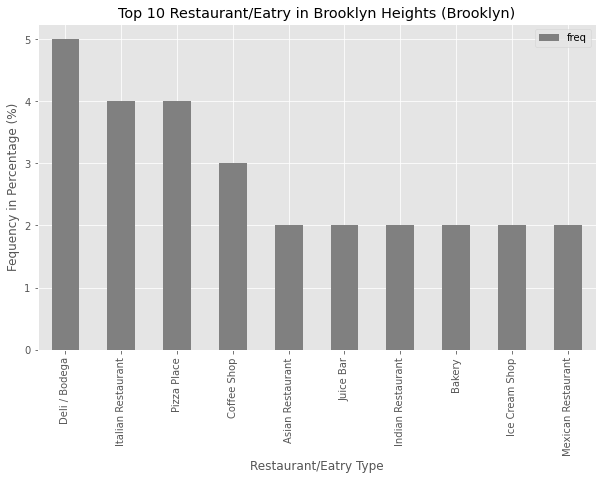

In [240]:
# step 1: import lotting libraries
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

# step 2: plot data
top_bk.plot(kind='bar', figsize=(10, 6), color="grey")

plt.xlabel('Restaurant/Eatry Type') # add to x-label to the plot
plt.ylabel('Fequency in Percentage (%)') # add y-label to the plot
plt.title('Top 10 Restaurant/Eatry in Brooklyn Heights (Brooklyn)') # add title to the plot

plt.show()

#### Manhattan

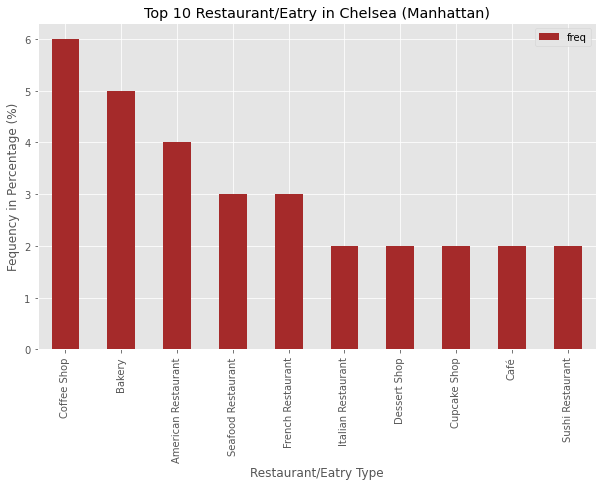

In [239]:
# plot data 
top_mn.plot(kind='bar', figsize=(10, 6), color="brown")

plt.xlabel('Restaurant/Eatry Type') # add to x-label to the plot
plt.ylabel('Fequency in Percentage (%)') # add y-label to the plot
plt.title('Top 10 Restaurant/Eatry in Chelsea (Manhattan)') # add title to the plot

plt.show()

#### Queens

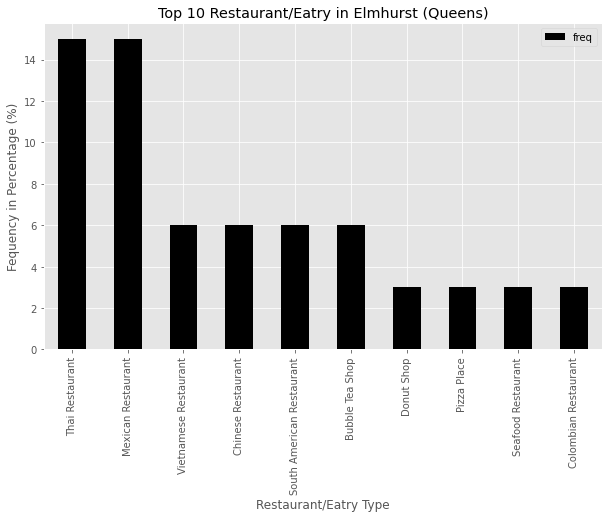

In [238]:
# plot data 
top_qu.plot(kind='bar', figsize=(10, 6), color="Black")

plt.xlabel('Restaurant/Eatry Type') # add to x-label to the plot
plt.ylabel('Fequency in Percentage (%)') # add y-label to the plot
plt.title('Top 10 Restaurant/Eatry in Elmhurst (Queens)') # add title to the plot

plt.show()

#### Bronx

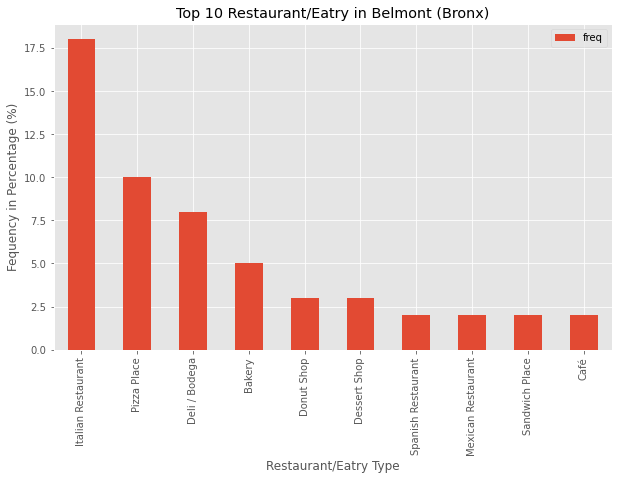

In [234]:
# plot data 
top_bx.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Restaurant/Eatry Type') # add to x-label to the plot
plt.ylabel('Fequency in Percentage (%)') # add y-label to the plot
plt.title('Top 10 Restaurant/Eatry in Belmont (Bronx)') # add title to the plot

plt.show()

#### Staten Island

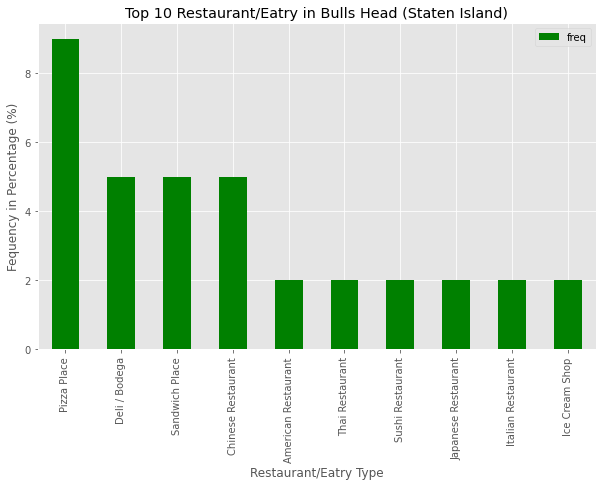

In [237]:
# plot data 
top_st.plot(kind='bar', figsize=(10, 6), color="green")

plt.xlabel('Restaurant/Eatry Type') # add to x-label to the plot
plt.ylabel('Fequency in Percentage (%)') # add y-label to the plot
plt.title('Top 10 Restaurant/Eatry in Bulls Head (Staten Island)') # add title to the plot

plt.show()